## Completed

In [1]:
# Standard libraries
import sys  # System-specific parameters and functions
import os   # Miscellaneous operating system interfaces
import warnings  # Warning control
warnings.filterwarnings("ignore")

# Data manipulation
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations

# LOADING THE DATASET
import gdown

# Convert to a direct download link (Excel format)
download_url = "https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx"

# Output filename
output_file = "downloaded_file.xlsx"

# Download the file
gdown.download(download_url, output=output_file, quiet=False)

# === Step 2: Read Excel File ===
data = pd.read_excel(output_file)

# Create a copy of the data
df = data.copy()

# Create a copy of the data
df = data.copy()

# Display column names
df.columns
df

Downloading...
From: https://docs.google.com/spreadsheets/d/1tjx2ifyUsAAB-yxxuvTIjXNmkomA9OzW/export?format=xlsx
To: /content/downloaded_file.xlsx
16.9kB [00:00, 27.7MB/s]


Year  Month  Day  Inflation
0    2000      1   31   0.329139
1    2000      2   28   1.940367
2    2000      3   31   4.469678
3    2000      4   30   3.672022
4    2000      5   31   2.382412
..    ...    ...  ...        ...
298  2024     11   30  -2.068252
299  2024     12   31  -1.742696
300  2025      1   31  -4.035874
301  2025      2   28  -4.187438
302  2025      3   31  -2.592781

[303 rows x 4 columns]

In [2]:
df.columns
# Create a new 'Date' column by combining 'Year', 'Month', and 'Day'
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Set 'Date' as the index
df.set_index('Date', inplace=True)
# Drop the 'Year', 'Month', and 'Day' columns
df.drop(columns=['Year', 'Month', 'Day'], inplace=True)

# Display the first few rows to verify changes
print(df.head())

# Check the updated index
print(df.index)

            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
DatetimeIndex(['2000-01-31', '2000-02-28', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2024-06-30', '2024-07-31', '2024-08-31', '2024-09-30',
               '2024-10-31', '2024-11-30', '2024-12-31', '2025-01-31',
               '2025-02-28', '2025-03-31'],
              dtype='datetime64[ns]', name='Date', length=303, freq=None)


In [3]:
df

Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412
...               ...
2024-11-30  -2.068252
2024-12-31  -1.742696
2025-01-31  -4.035874
2025-02-28  -4.187438
2025-03-31  -2.592781

[303 rows x 1 columns]

In [4]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your time series data is in 'df' and it's in a column called 'value'
# Splitting the data into 70% for training and 30% for testing
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Inspect the first few rows of training and testing sets
print(train.head(), test.head())


            Inflation
Date                 
2000-01-31   0.329139
2000-02-28   1.940367
2000-03-31   4.469678
2000-04-30   3.672022
2000-05-31   2.382412             Inflation
Date                 
2020-03-31   5.371248
2020-04-30   5.196850
2020-05-31   4.031008
2020-06-30   3.917051
2020-07-31   4.153846


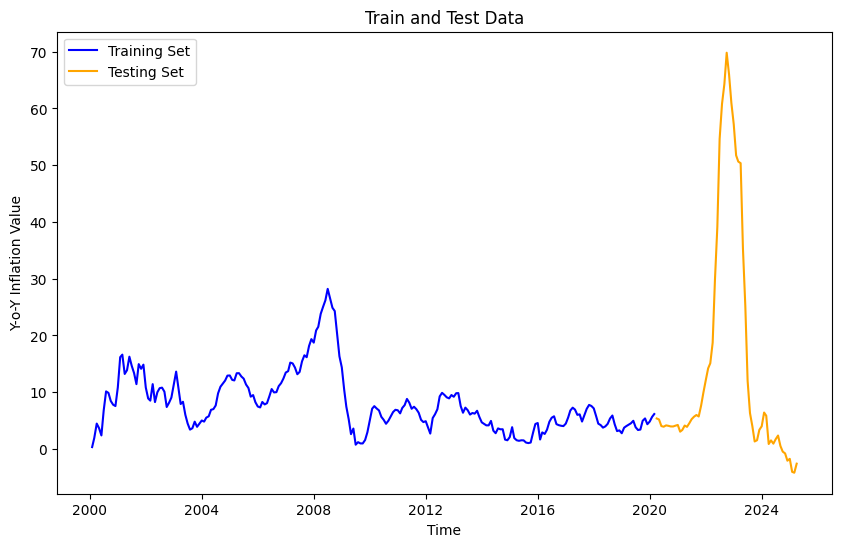

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



# Plotting the train and test sets
plt.figure(figsize=(10, 6))
plt.plot(train, label='Training Set', color='blue')
plt.plot(test, label='Testing Set', color='orange')
plt.title('Train and Test Data')
plt.xlabel('Time')
plt.ylabel('Y-o-Y Inflation Value')
plt.legend()
plt.show()


In [6]:
df.columns

Index(['Inflation'], dtype='object')

In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Assuming 'df' contains the inflation data in a column named 'Inflation'

# Step 1: Create lag features
max_lag = 12  # Maximum number of lags
for lag in range(1, max_lag + 1):
    df[f'Inflation_Lag_{lag}'] = df['Inflation'].shift(lag)

# Drop NaN values caused by shifting (we can't use rows with missing lag values)
df = df.dropna()

# Step 2: Split the data into train and test sets
train_size = int(0.8 * len(df))
train = df[:train_size]
test = df[train_size:]

# Define dependent variable y (current inflation)
y_train = train['Inflation']
y_test = test['Inflation']

# Define exogenous variables X (past 12 lags of inflation)
X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]


In [8]:
X_test

Inflation_Lag_1  Inflation_Lag_2  Inflation_Lag_3  \
Date                                                            
2020-05-31         5.196850         5.371248         6.151420   
2020-06-30         4.031008         5.196850         5.371248   
2020-07-31         3.917051         4.031008         5.196850   
2020-08-31         4.153846         3.917051         4.031008   
2020-09-30         4.073789         4.153846         3.917051   
2020-10-31         3.966438         4.073789         4.153846   
2020-11-30         3.960396         3.966438         4.073789   
2020-12-31         4.100228         3.960396         3.966438   
2021-01-31         4.229607         4.100228         3.960396   
2021-02-28         3.046062         4.229607         4.100228   
2021-03-31         3.343239         3.046062         4.229607   
2021-04-30         4.122939         3.343239         3.046062   
2021-05-31         3.892216         4.122939         3.343239   
2021-06-30         4.545455         3.892216         4.122939   
2021-07-31         5.247598         4.545455         3.892216   
2021-08-31         5.686854         5.247598         4.545455   
2021-09-30         5.982275         5.686854         5.247598   
2021-10-31         5.722671         5.982275         5.686854   
2021-11-30         7.619048         5.722671         5.982275   
2021-12-31         9.919767         7.619048         5.722671   
2022-01-31        12.101449         9.919767         7.619048   
2022-02-28        14.203317        12.101449         9.919767   
2022-03-31        15.097052        14.203317        12.101449   
2022-04-30        18.718503        15.097052        14.203317   
2022-05-31        29.827089        18.718503        15.097052   
2022-06-30        39.130435        29.827089        18.718503   
2022-07-31        54.634831        39.130435        29.827089   
2022-08-31        60.796646        54.634831        39.130435   
2022-09-30        64.320557        60.796646        54.634831   
2022-10-31        69.812630        64.320557        60.796646   
2022-11-30        65.963240        69.812630        64.320557   
2022-12-31        60.982084        65.963240        69.812630   
2023-01-31        57.207498        60.982084        65.963240   
2023-02-28        51.729686        57.207498        60.982084   
2023-03-31        50.635930        51.729686        57.207498   
2023-04-30        50.346955        50.635930        51.729686   
2023-05-31        35.327234        50.346955        50.635930   
2023-06-30        25.195313        35.327234        50.346955   
2023-07-31        11.997670        25.195313        35.327234   
2023-08-31         6.316378        11.997670        25.195313   
2023-09-30         3.993435         6.316378        11.997670   
2023-10-31         1.320655         3.993435         6.316378   
2023-11-30         1.538462         1.320655         3.993435   
2023-12-31         3.367183         1.538462         1.320655   
2024-01-31         3.997868         3.367183         1.538462   
2024-02-28         6.415695         3.997868         3.367183   
2024-03-31         5.857520         6.415695         3.997868   
2024-04-30         0.871795         5.857520         6.415695   
2024-05-31         1.508060         0.871795         5.857520   
2024-06-30         0.936037         1.508060         0.871795   
2024-07-31         1.716069         0.936037         1.508060   
2024-08-31         2.365931         1.716069         0.936037   
2024-09-30         0.526039         2.365931         1.716069   
2024-10-31        -0.469239         0.526039         2.365931   
2024-11-30        -0.783699        -0.469239         0.526039   
2024-12-31        -2.068252        -0.783699        -0.469239   
2025-01-31        -1.742696        -2.068252        -0.783699   
2025-02-28        -4.035874        -1.742696        -2.068252   
2025-03-31        -4.187438        -4.035874        -1.742696   

            Inflation_Lag_4  Inflation_Lag_5  

Mean Squared Error (MSE): 209.0920669396282
Root Mean Squared Error (RMSE): 14.460016145897908
Mean Absolute Error (MAE): 7.778159145048289
Mean Absolute Percentage Error (MAPE): 76.16044172107233%
R-squared: 0.5436516179258624


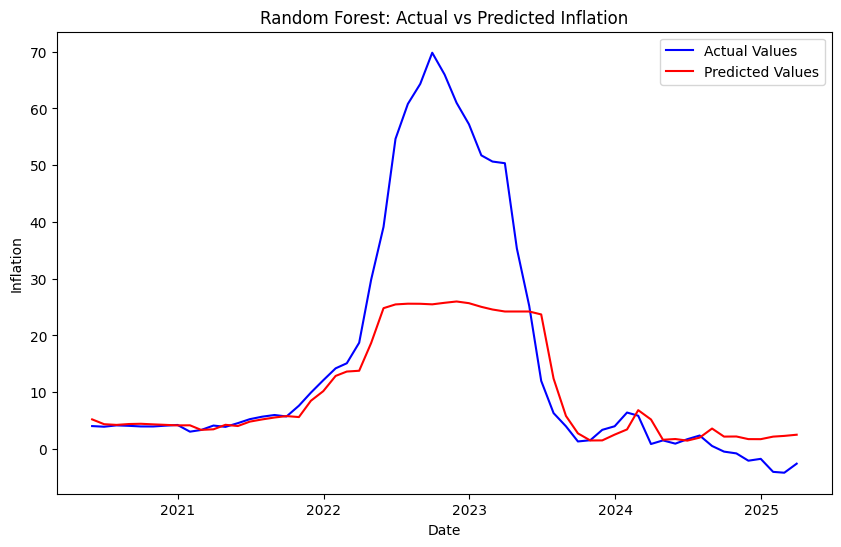

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Step 2: Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE is percentage error
r2 = r2_score(y_test, y_pred)  # R-squared

# Print all metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
print(f"R-squared: {r2}")

# Step 5: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual Values", color='blue')
plt.plot(y_test.index, y_pred, label="Predicted Values", color='red')
plt.title("Random Forest: Actual vs Predicted Inflation")
plt.xlabel("Date")
plt.ylabel("Inflation")
plt.legend()
plt.show()

In [10]:
!pip install optuna

## Random FOrest With DIfferent Lagged Features

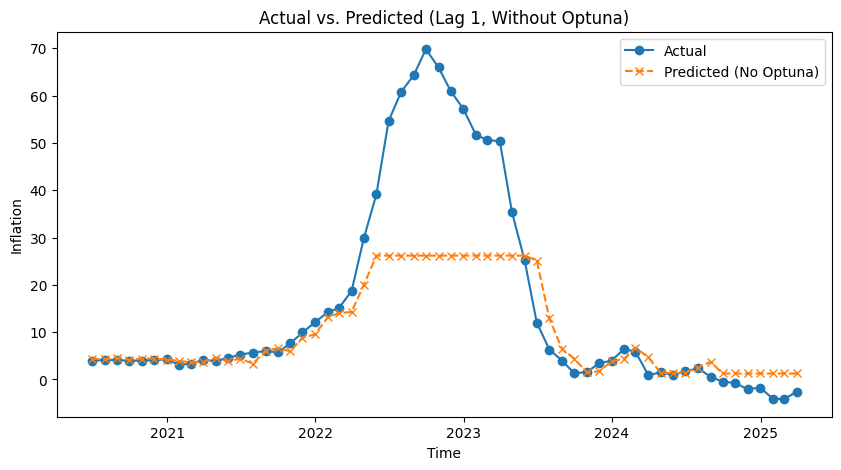

[I 2025-05-29 06:06:43,635] A new study created in memory with name: no-name-a24a44ce-a675-49d2-a7b6-51628b307fc3
[I 2025-05-29 06:06:45,234] Trial 0 finished with value: 1.861152838957133 and parameters: {'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.861152838957133.
[I 2025-05-29 06:06:46,194] Trial 1 finished with value: 1.893252298029796 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 1.861152838957133.
[I 2025-05-29 06:06:48,425] Trial 2 finished with value: 1.8592427404982885 and parameters: {'n_estimators': 200, 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 2 with value: 1.8592427404982885.
[I 2025-05-29 06:06:49,393] Trial 3 finished with value: 1.860979252881855 and parameters: {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 4}. Best is trial 2 with value: 1.8

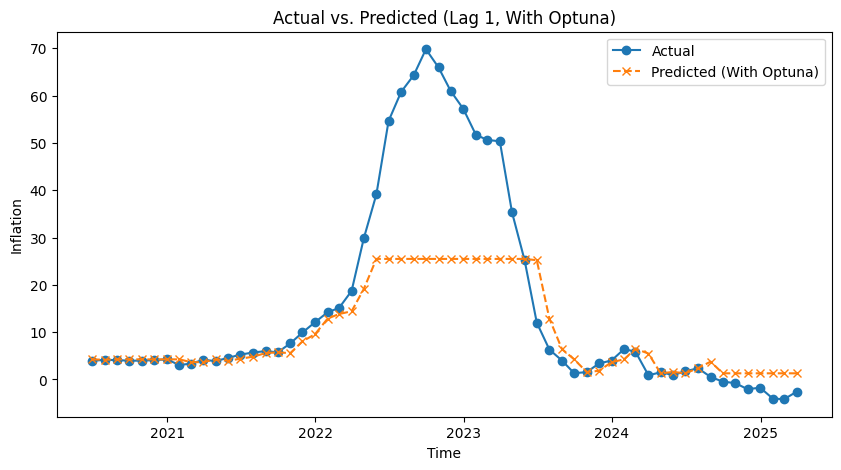

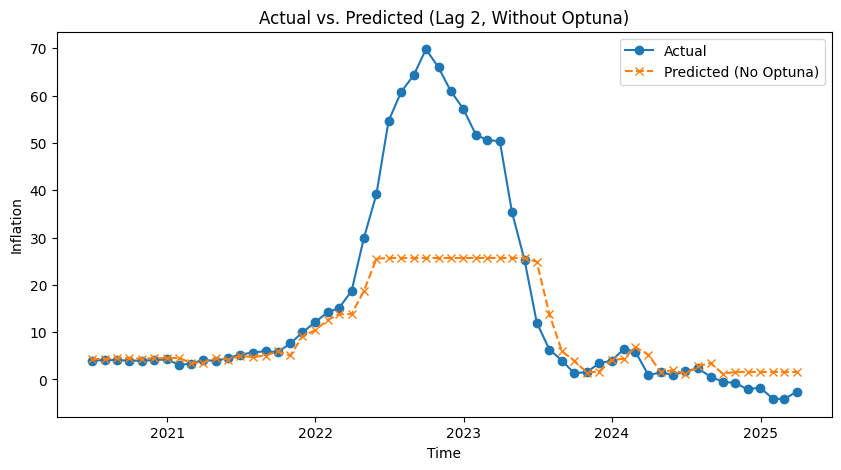

[I 2025-05-29 06:07:42,020] A new study created in memory with name: no-name-3f076132-b6cc-40a5-bcb5-0d33eb9b0f93
[I 2025-05-29 06:07:42,741] Trial 0 finished with value: 1.9641489939173173 and parameters: {'n_estimators': 50, 'max_depth': 50, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.9641489939173173.
[I 2025-05-29 06:07:44,706] Trial 1 finished with value: 1.9785362463045941 and parameters: {'n_estimators': 150, 'max_depth': 35, 'min_samples_split': 6, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.9641489939173173.
[I 2025-05-29 06:07:47,228] Trial 2 finished with value: 1.9861710605624858 and parameters: {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.9641489939173173.
[I 2025-05-29 06:07:50,175] Trial 3 finished with value: 1.9749250723341565 and parameters: {'n_estimators': 250, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 0 with value

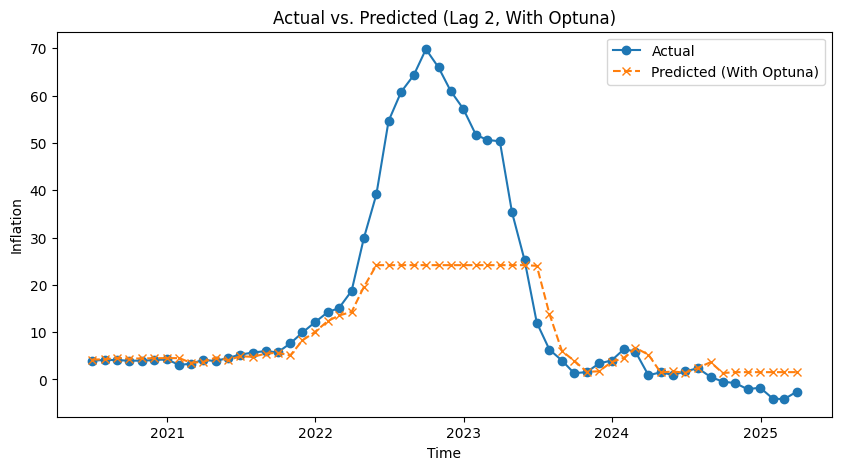

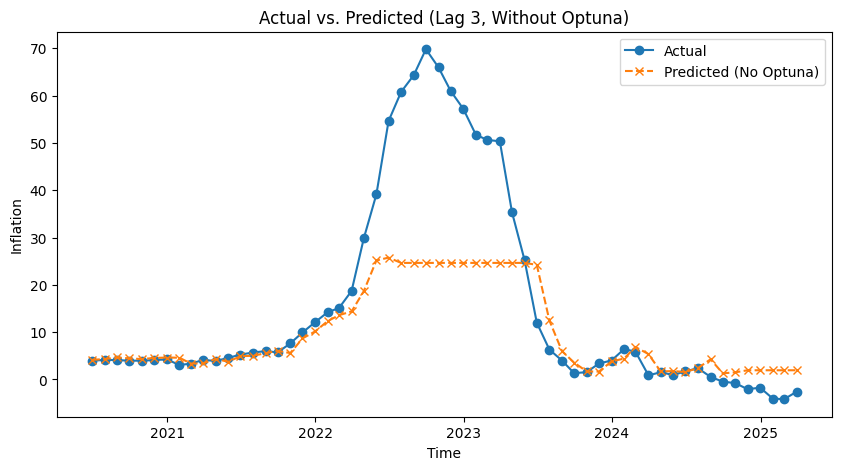

[I 2025-05-29 06:08:12,704] A new study created in memory with name: no-name-931b92cf-c638-4873-a1d5-9cbda2b713d8
[I 2025-05-29 06:08:14,252] Trial 0 finished with value: 1.956209127386206 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.956209127386206.
[I 2025-05-29 06:08:14,866] Trial 1 finished with value: 1.9135553193442039 and parameters: {'n_estimators': 50, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 1}. Best is trial 1 with value: 1.9135553193442039.
[I 2025-05-29 06:08:17,036] Trial 2 finished with value: 1.9779359299926818 and parameters: {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 1.9135553193442039.
[I 2025-05-29 06:08:17,747] Trial 3 finished with value: 1.9739023191114744 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 1 with value: 

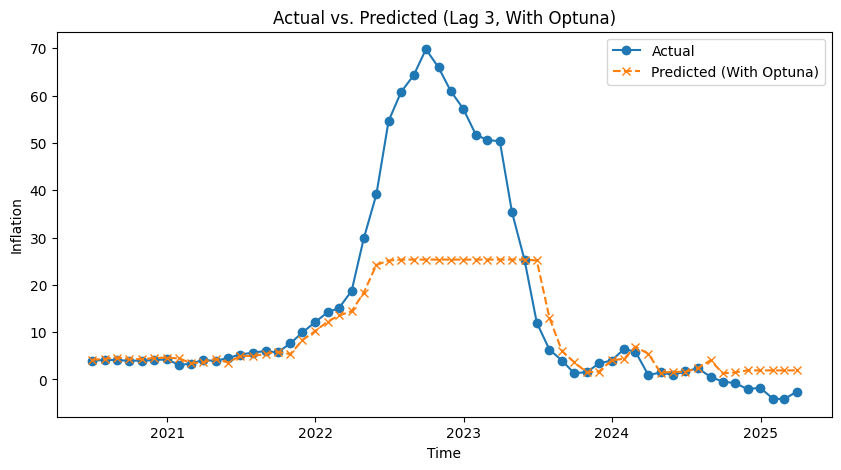

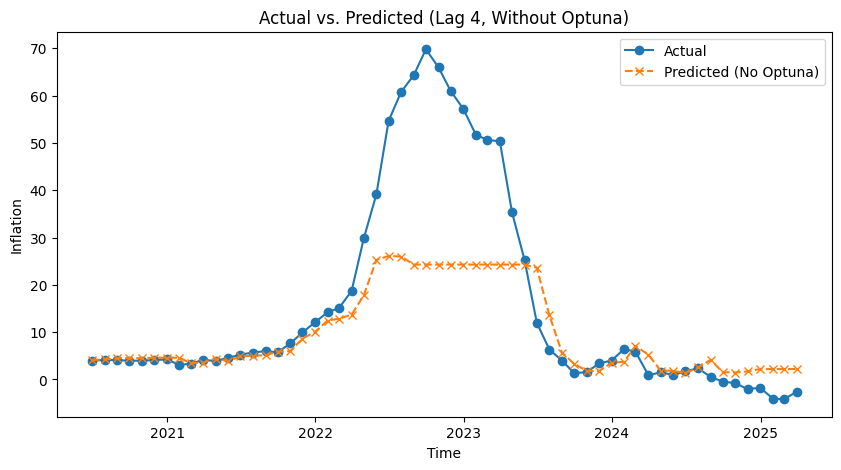

[I 2025-05-29 06:08:34,515] A new study created in memory with name: no-name-6a3fb06a-5b49-4c69-8b98-c523c184deb2
[I 2025-05-29 06:08:35,919] Trial 0 finished with value: 1.9573064507082527 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 1.9573064507082527.
[I 2025-05-29 06:08:37,642] Trial 1 finished with value: 1.9551014568383018 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 1.9551014568383018.
[I 2025-05-29 06:08:39,376] Trial 2 finished with value: 1.9493189481430409 and parameters: {'n_estimators': 250, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 2 with value: 1.9493189481430409.
[I 2025-05-29 06:08:39,955] Trial 3 finished with value: 2.0049754926999634 and parameters: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 2 with value

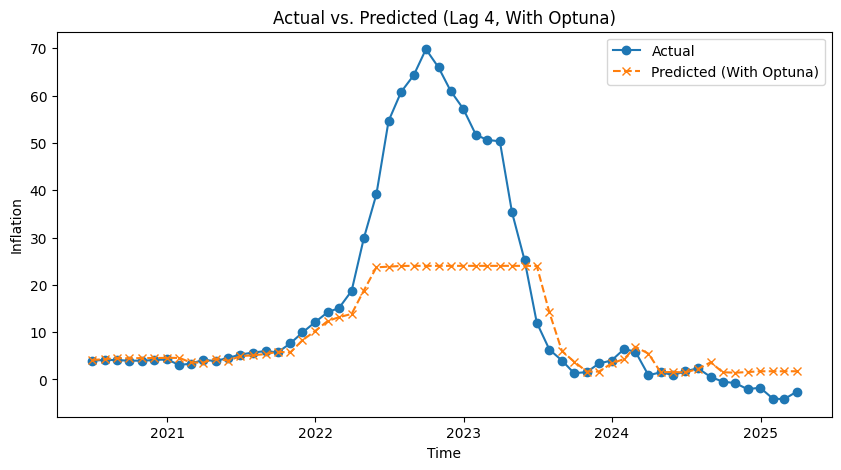

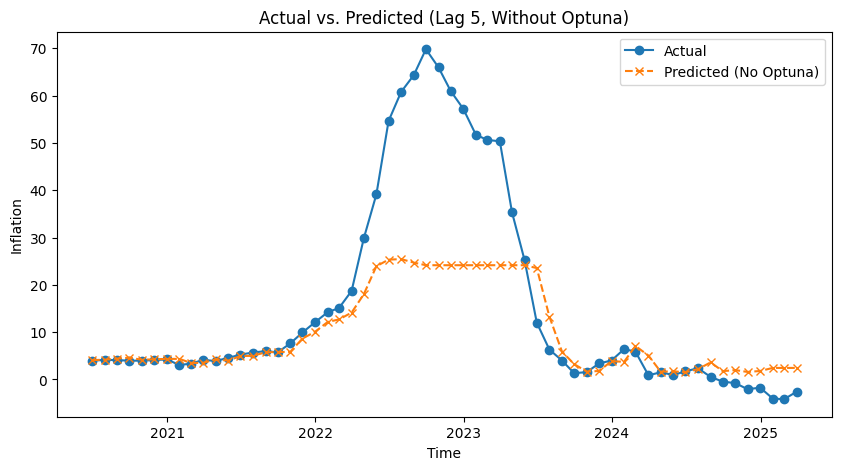

[I 2025-05-29 06:09:07,115] A new study created in memory with name: no-name-f3284fdf-f060-4394-9674-87a056c8a61d
[I 2025-05-29 06:09:07,742] Trial 0 finished with value: 1.9885019593932374 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.9885019593932374.
[I 2025-05-29 06:09:09,157] Trial 1 finished with value: 2.0008657583601943 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5}. Best is trial 0 with value: 1.9885019593932374.
[I 2025-05-29 06:09:10,244] Trial 2 finished with value: 2.021771968756348 and parameters: {'n_estimators': 150, 'max_depth': 45, 'min_samples_split': 9, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.9885019593932374.
[I 2025-05-29 06:09:10,975] Trial 3 finished with value: 1.9998766331728717 and parameters: {'n_estimators': 100, 'max_depth': 45, 'min_samples_split': 8, 'min_samples_leaf': 5}. Best is trial 0 with value: 1

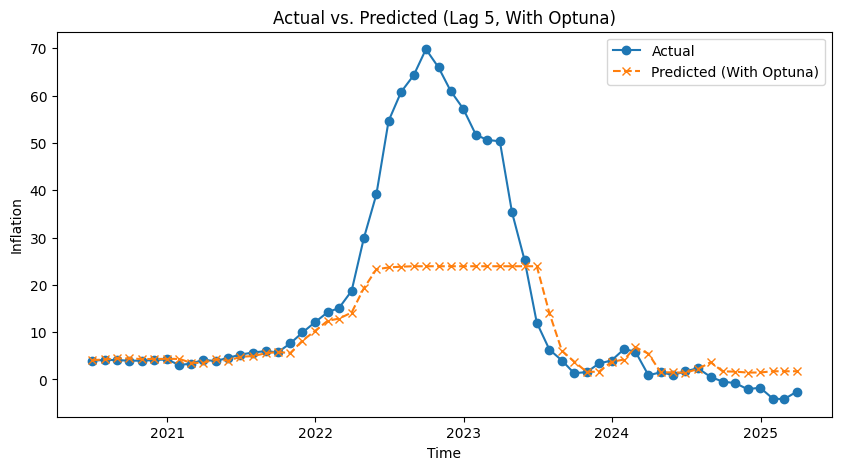

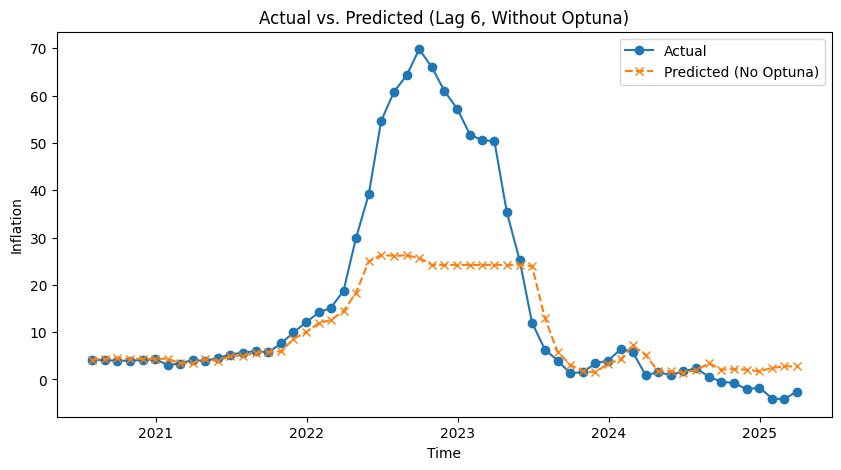

[I 2025-05-29 06:09:39,753] A new study created in memory with name: no-name-a7ae4abf-35d0-43b4-92d7-ec3c5939141b
[I 2025-05-29 06:09:41,445] Trial 0 finished with value: 1.983303954478029 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.983303954478029.
[I 2025-05-29 06:09:44,788] Trial 1 finished with value: 1.992750703015318 and parameters: {'n_estimators': 250, 'max_depth': 40, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.983303954478029.
[I 2025-05-29 06:09:46,054] Trial 2 finished with value: 1.970723642020431 and parameters: {'n_estimators': 100, 'max_depth': 50, 'min_samples_split': 3, 'min_samples_leaf': 4}. Best is trial 2 with value: 1.970723642020431.
[I 2025-05-29 06:09:46,957] Trial 3 finished with value: 1.9508166211754958 and parameters: {'n_estimators': 100, 'max_depth': 40, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 3 with value: 1.95

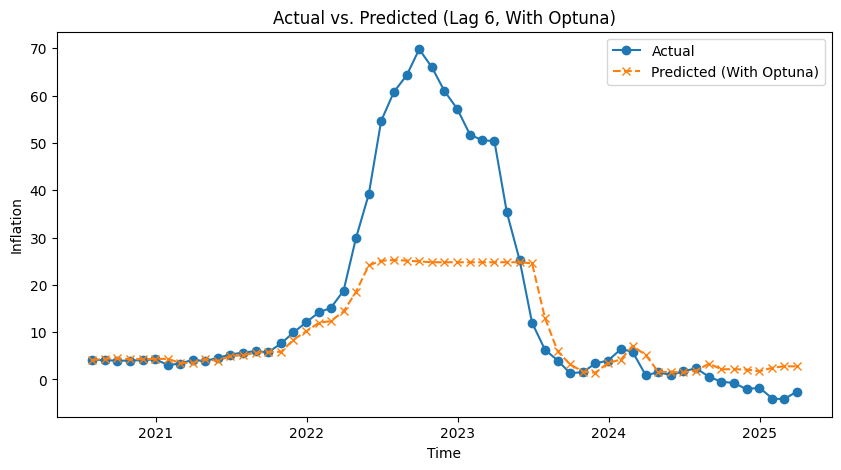

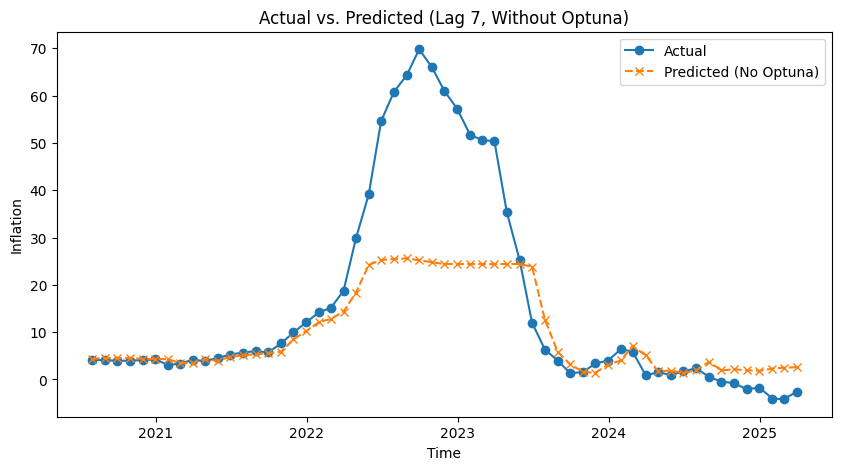

[I 2025-05-29 06:10:07,633] A new study created in memory with name: no-name-1c9856a9-0850-443e-a12a-adec93480df8
[I 2025-05-29 06:10:09,846] Trial 0 finished with value: 1.9414452275227987 and parameters: {'n_estimators': 250, 'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.9414452275227987.
[I 2025-05-29 06:10:10,511] Trial 1 finished with value: 1.988395563197161 and parameters: {'n_estimators': 50, 'max_depth': 30, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.9414452275227987.
[I 2025-05-29 06:10:12,984] Trial 2 finished with value: 1.9547739375407764 and parameters: {'n_estimators': 250, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.9414452275227987.
[I 2025-05-29 06:10:13,378] Trial 3 finished with value: 1.987342085188202 and parameters: {'n_estimators': 50, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.9

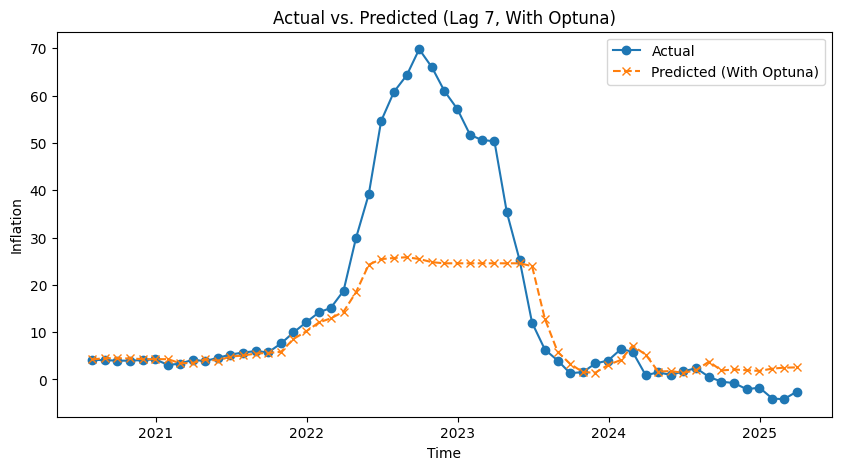

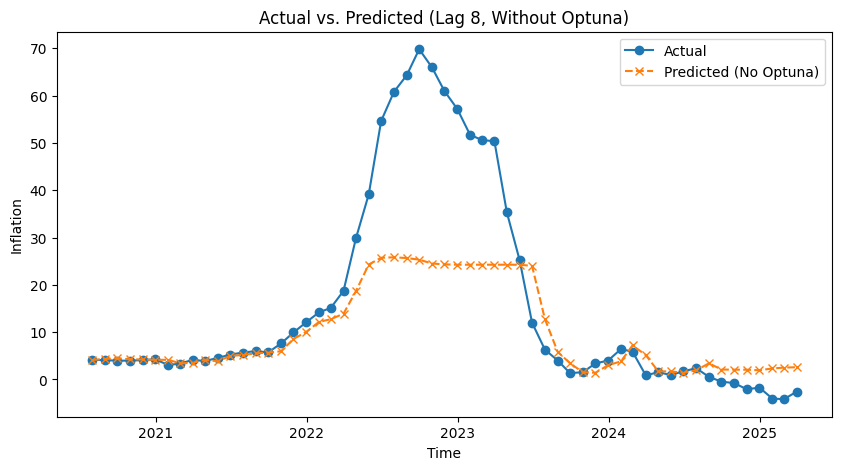

[I 2025-05-29 06:10:46,466] A new study created in memory with name: no-name-6fbeac28-c978-4ae1-9f60-bb280fe38028
[I 2025-05-29 06:10:49,875] Trial 0 finished with value: 1.9792992167043502 and parameters: {'n_estimators': 300, 'max_depth': 50, 'min_samples_split': 10, 'min_samples_leaf': 2}. Best is trial 0 with value: 1.9792992167043502.
[I 2025-05-29 06:10:52,221] Trial 1 finished with value: 1.9847378745091757 and parameters: {'n_estimators': 300, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 3}. Best is trial 0 with value: 1.9792992167043502.
[I 2025-05-29 06:10:54,247] Trial 2 finished with value: 1.9493646938297993 and parameters: {'n_estimators': 250, 'max_depth': 30, 'min_samples_split': 6, 'min_samples_leaf': 3}. Best is trial 2 with value: 1.9493646938297993.
[I 2025-05-29 06:10:56,200] Trial 3 finished with value: 2.0071195243416495 and parameters: {'n_estimators': 250, 'max_depth': 40, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 2 with va

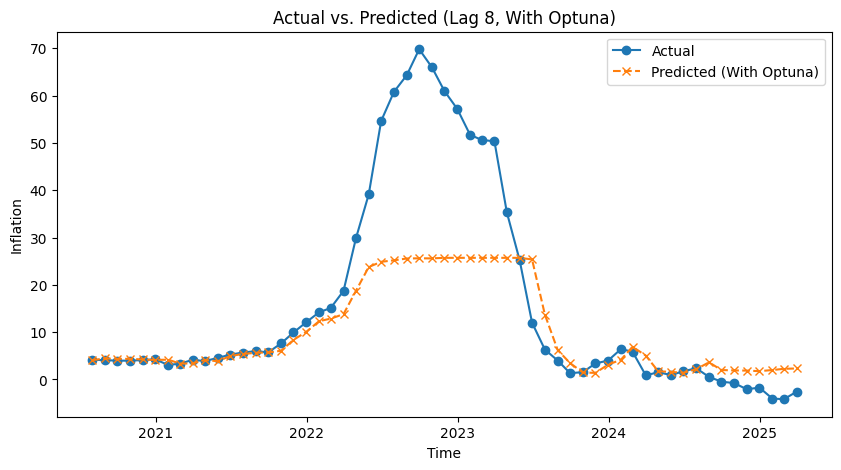

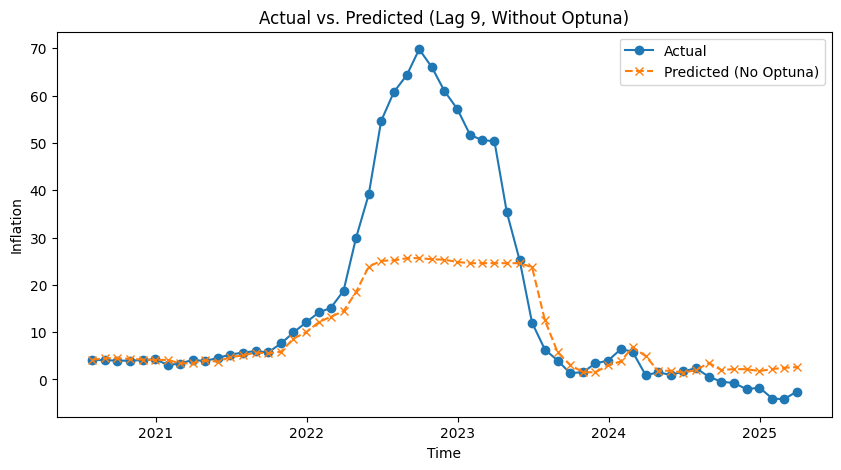

[I 2025-05-29 06:11:15,222] A new study created in memory with name: no-name-8ed01880-8171-4f75-8d65-7db4e3b5a37a
[I 2025-05-29 06:11:17,669] Trial 0 finished with value: 2.1249554515911675 and parameters: {'n_estimators': 300, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.1249554515911675.
[I 2025-05-29 06:11:18,959] Trial 1 finished with value: 2.106342565375287 and parameters: {'n_estimators': 150, 'max_depth': 35, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 1 with value: 2.106342565375287.
[I 2025-05-29 06:11:21,274] Trial 2 finished with value: 2.1681572812136225 and parameters: {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 2.106342565375287.
[I 2025-05-29 06:11:22,869] Trial 3 finished with value: 2.0594867434610538 and parameters: {'n_estimators': 200, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 3 with value: 2.

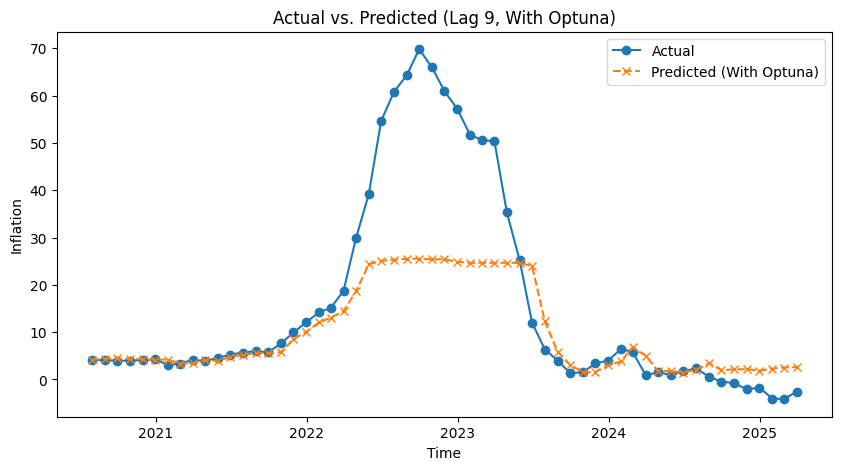

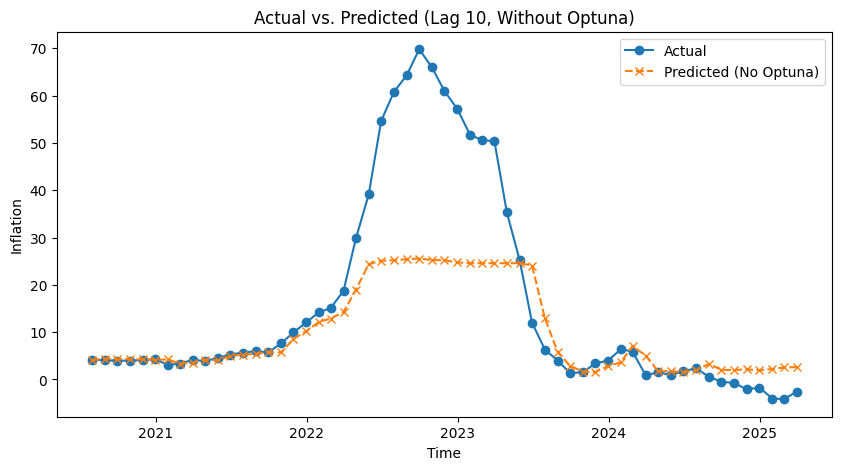

[I 2025-05-29 06:11:53,688] A new study created in memory with name: no-name-54c80728-1288-44c8-be9d-8d3413d9ceb8
[I 2025-05-29 06:11:54,657] Trial 0 finished with value: 2.1532511508292975 and parameters: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.1532511508292975.
[I 2025-05-29 06:11:55,884] Trial 1 finished with value: 2.2442200339791003 and parameters: {'n_estimators': 150, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 0 with value: 2.1532511508292975.
[I 2025-05-29 06:11:56,722] Trial 2 finished with value: 2.281394578438493 and parameters: {'n_estimators': 100, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 0 with value: 2.1532511508292975.
[I 2025-05-29 06:11:59,261] Trial 3 finished with value: 2.1975449121693753 and parameters: {'n_estimators': 300, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 0 with value: 

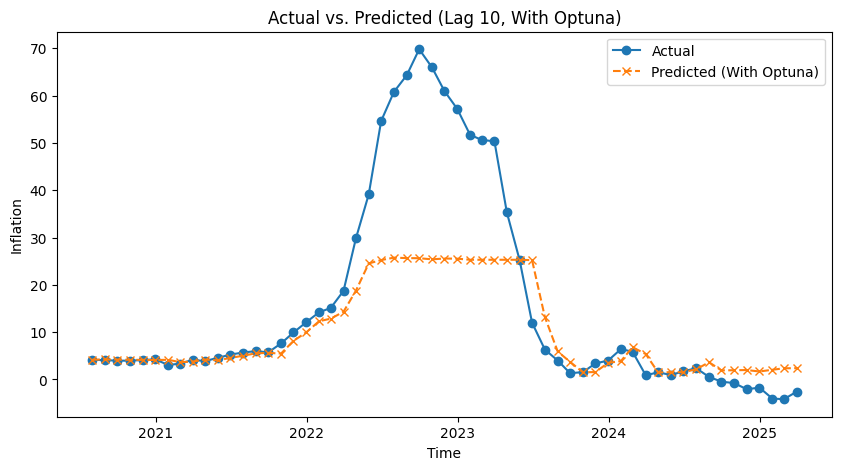

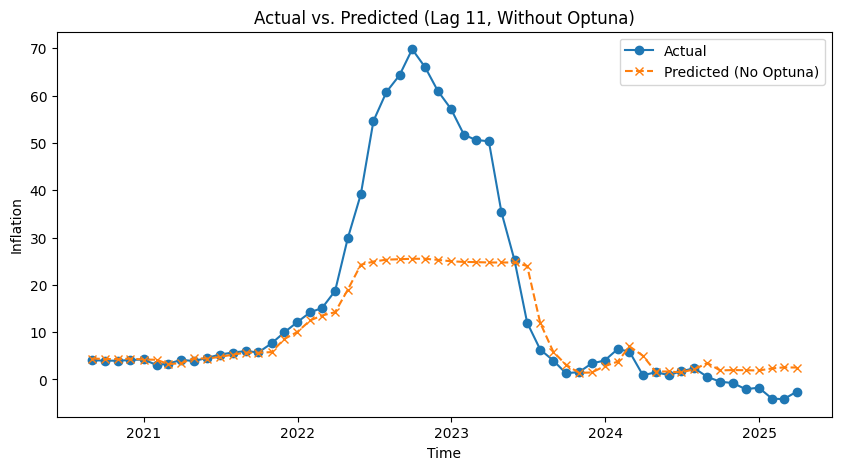

[I 2025-05-29 06:12:23,863] A new study created in memory with name: no-name-ba03a55a-a109-458a-adbd-fce09e2e3a59
[I 2025-05-29 06:12:25,471] Trial 0 finished with value: 2.509247933246589 and parameters: {'n_estimators': 150, 'max_depth': 50, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.509247933246589.
[I 2025-05-29 06:12:27,725] Trial 1 finished with value: 2.476639361268605 and parameters: {'n_estimators': 200, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 3}. Best is trial 1 with value: 2.476639361268605.
[I 2025-05-29 06:12:28,497] Trial 2 finished with value: 2.5188970706579417 and parameters: {'n_estimators': 50, 'max_depth': 40, 'min_samples_split': 5, 'min_samples_leaf': 1}. Best is trial 1 with value: 2.476639361268605.
[I 2025-05-29 06:12:29,100] Trial 3 finished with value: 2.5183408085060153 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 5}. Best is trial 1 with value: 2.476

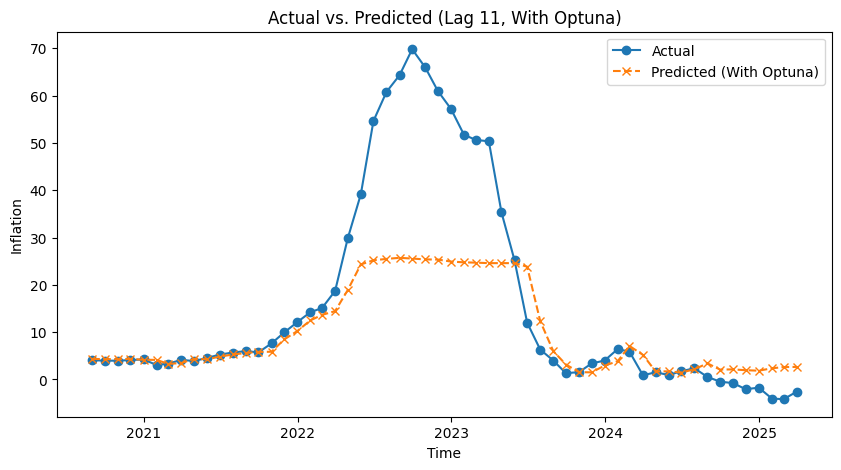

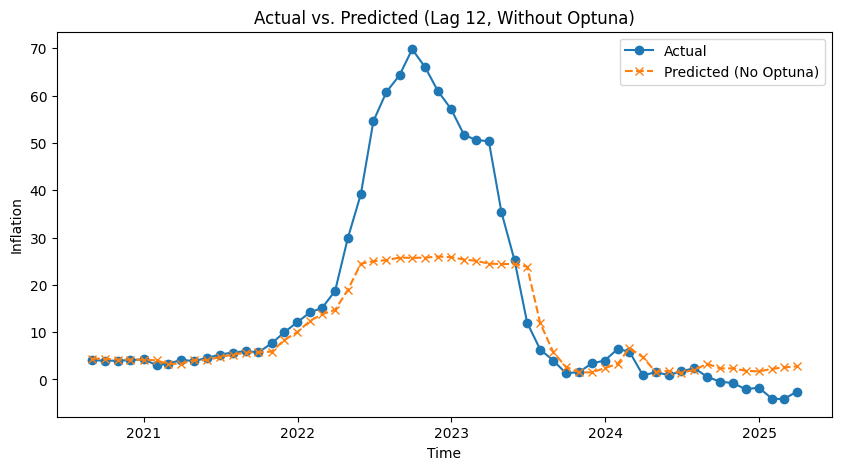

[I 2025-05-29 06:13:11,838] A new study created in memory with name: no-name-23f6ff59-3e48-4129-a218-6391d14901ac
[I 2025-05-29 06:13:13,665] Trial 0 finished with value: 2.5097980700125437 and parameters: {'n_estimators': 150, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 1}. Best is trial 0 with value: 2.5097980700125437.
[I 2025-05-29 06:13:15,303] Trial 1 finished with value: 2.4751267918033903 and parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 4, 'min_samples_leaf': 2}. Best is trial 1 with value: 2.4751267918033903.
[I 2025-05-29 06:13:16,335] Trial 2 finished with value: 2.4625492709717345 and parameters: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 3, 'min_samples_leaf': 2}. Best is trial 2 with value: 2.4625492709717345.
[I 2025-05-29 06:13:17,871] Trial 3 finished with value: 2.4866888035297925 and parameters: {'n_estimators': 150, 'max_depth': 45, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 2 with value

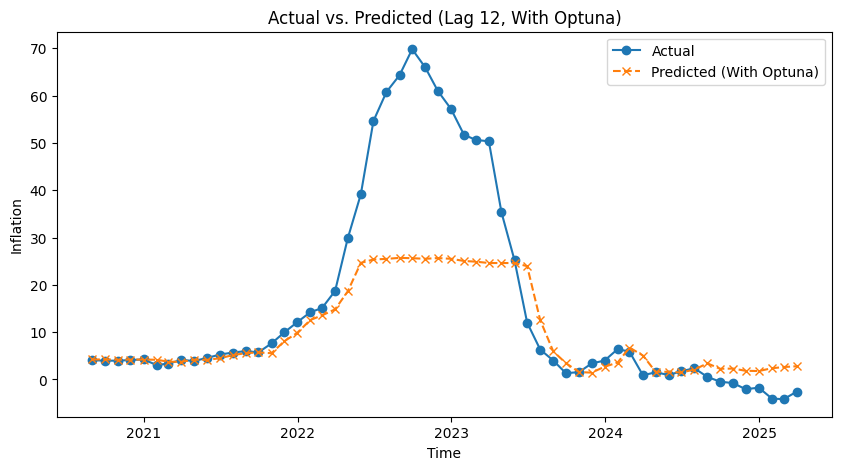

In [11]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 13):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.8 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train Random Forest model without Optuna
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, r2, "N/A"])

    # Plot actual vs. predicted
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label="Actual", marker='o')
    plt.plot(y_test.index, y_pred, label="Predicted (No Optuna)", linestyle='dashed', marker='x')
    plt.title(f'Actual vs. Predicted (Lag {max_lag}, Without Optuna)')
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.legend()
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 5, 50, step=5)
        min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)

        rf_model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=42
        )

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            rf_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = rf_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    rf_best = RandomForestRegressor(**best_params, random_state=42)
    rf_best.fit(X_train, y_train)
    y_pred_optuna = rf_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna, r2_optuna, best_params])

    # Plot actual vs. predicted for Optuna
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.index, y_test, label="Actual", marker='o')
    plt.plot(y_test.index, y_pred_optuna, label="Predicted (With Optuna)", linestyle='dashed', marker='x')
    plt.title(f'Actual vs. Predicted (Lag {max_lag}, With Optuna)')
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.legend()
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=['Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE', 'Test R^2', 'Best Parameters'])
results_df.to_csv('random_forest_lag_results_with_r2.csv', index=False)


### renamed as RF_80_20_ModelPerformance

## XGBoost With DIfferent Lagged Features

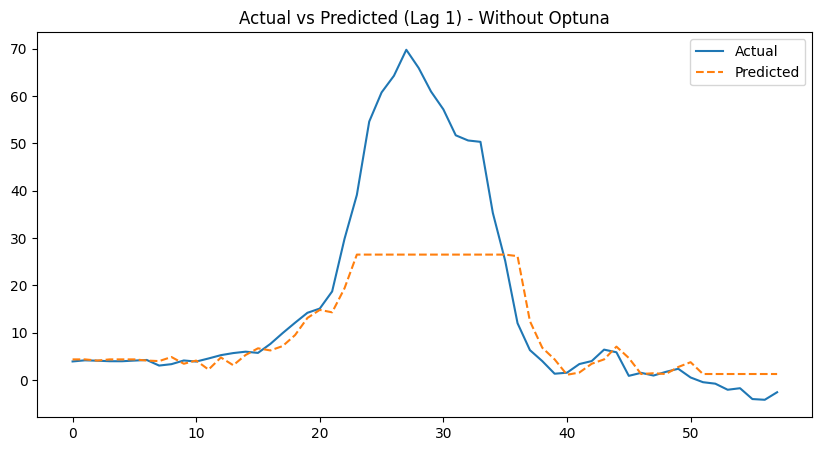

[I 2025-05-29 06:13:41,869] A new study created in memory with name: no-name-e5bcdd8a-472f-4943-aa15-c55aaf299691
[I 2025-05-29 06:13:42,453] Trial 0 finished with value: 2.2194127409432607 and parameters: {'n_estimators': 250, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 0 with value: 2.2194127409432607.
[I 2025-05-29 06:13:43,286] Trial 1 finished with value: 2.369142045486602 and parameters: {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.26, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.7}. Best is trial 0 with value: 2.2194127409432607.
[I 2025-05-29 06:13:43,636] Trial 2 finished with value: 2.19850438433489 and parameters: {'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.21000000000000002, 'min_child_weight': 8, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 2 with value: 2.19850438433489.
[I 2025-05-29 06:13:48,261] Trial 3 finished with value

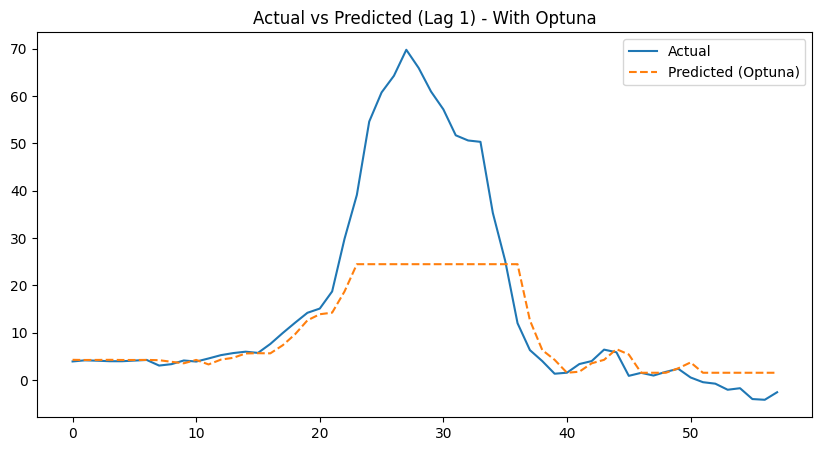

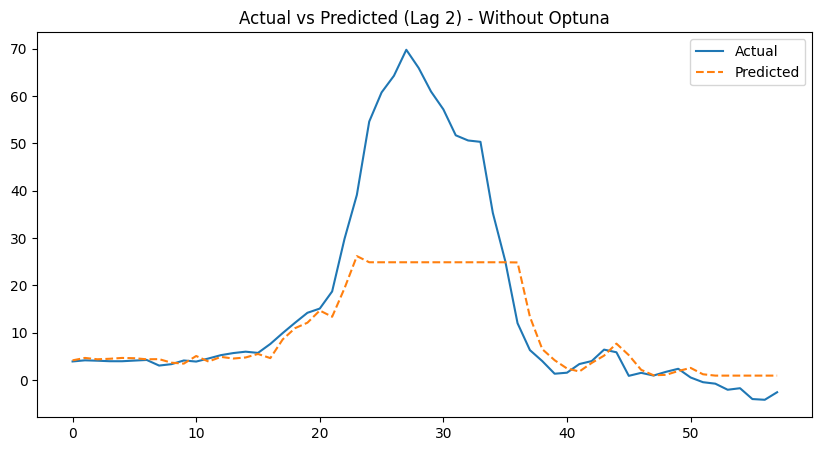

[I 2025-05-29 06:14:13,308] A new study created in memory with name: no-name-fb79c6eb-92cd-443e-be40-98bd7635a111
[I 2025-05-29 06:14:13,791] Trial 0 finished with value: 2.4297051481827294 and parameters: {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 1.0, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.4297051481827294.
[I 2025-05-29 06:14:13,919] Trial 1 finished with value: 2.193304629939383 and parameters: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.26, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 1 with value: 2.193304629939383.
[I 2025-05-29 06:14:14,103] Trial 2 finished with value: 2.1159882544242574 and parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.26, 'min_child_weight': 8, 'subsample': 0.9, 'colsample_bytree': 1.0}. Best is trial 2 with value: 2.1159882544242574.
[I 2025-05-29 06:14:16,501] Trial 3 finished with value: 2.47951408379

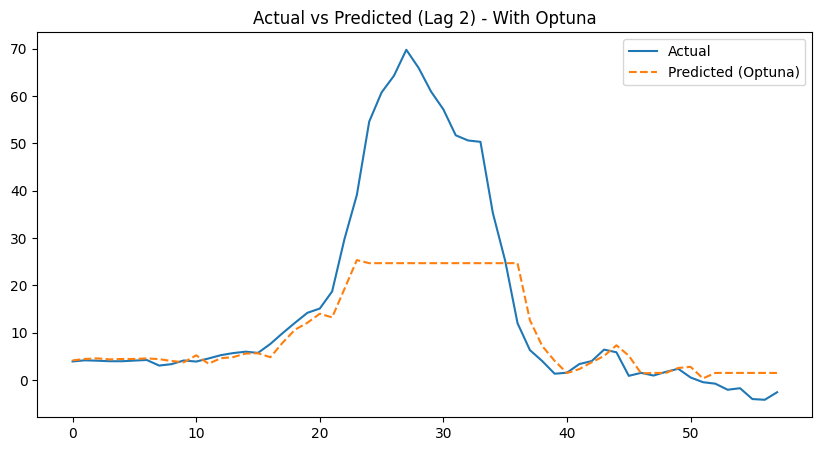

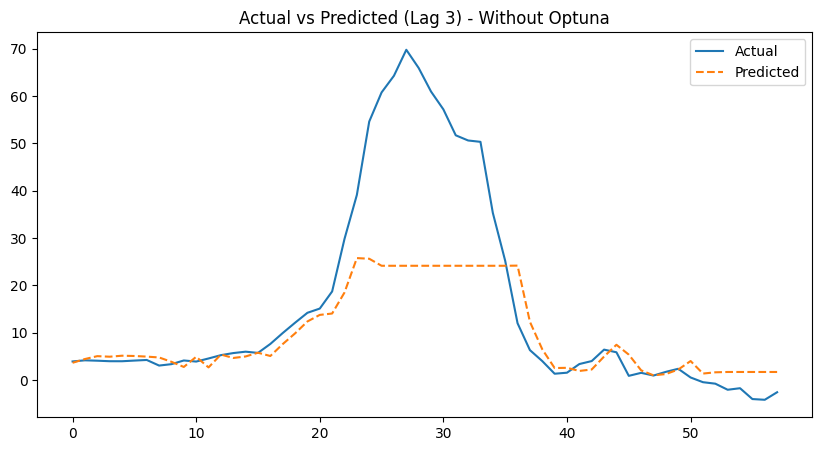

[I 2025-05-29 06:14:21,973] A new study created in memory with name: no-name-27310aec-e707-4e73-9d08-9c525135014c
[I 2025-05-29 06:14:22,148] Trial 0 finished with value: 2.377700639520609 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.11, 'min_child_weight': 3, 'subsample': 1.0, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.377700639520609.
[I 2025-05-29 06:14:22,426] Trial 1 finished with value: 2.1951982826387306 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.11, 'min_child_weight': 10, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 1 with value: 2.1951982826387306.
[I 2025-05-29 06:14:22,710] Trial 2 finished with value: 2.453045431913257 and parameters: {'n_estimators': 200, 'max_depth': 9, 'learning_rate': 0.16000000000000003, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.1951982826387306.
[I 2025-05-29 06:14:22,832] Trial 3 finished with value: 3.998961491

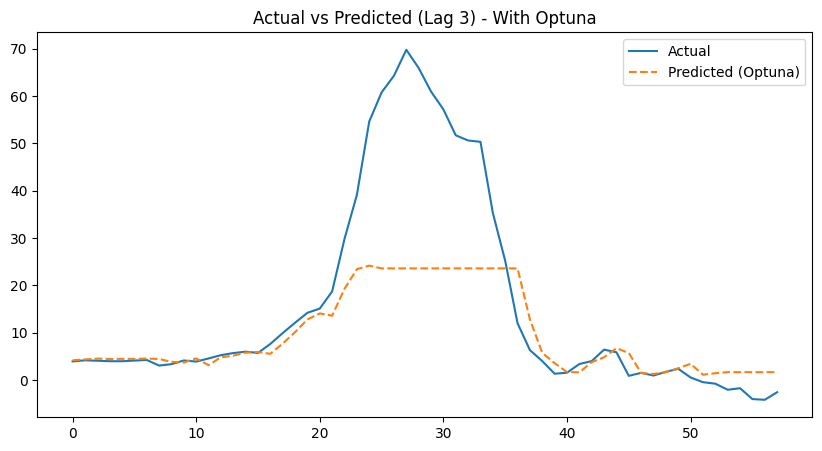

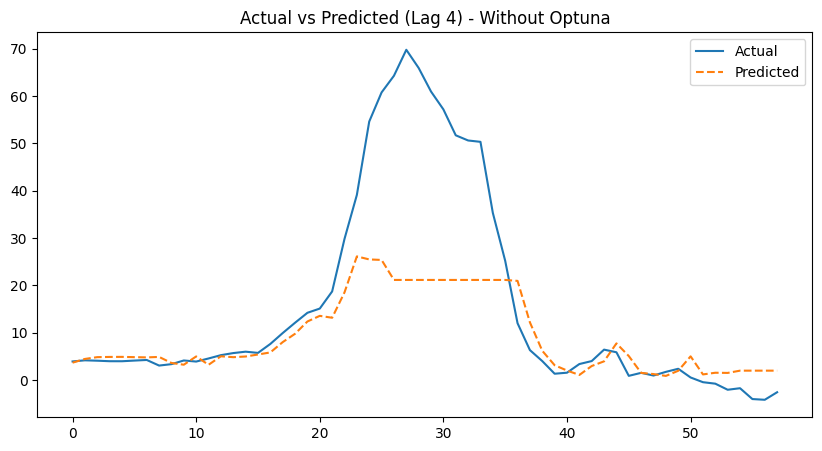

[I 2025-05-29 06:14:31,224] A new study created in memory with name: no-name-0d5a24fd-5680-463d-ab6d-3cf78fc75f05
[I 2025-05-29 06:14:31,671] Trial 0 finished with value: 2.4074197492338048 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.4074197492338048.
[I 2025-05-29 06:14:32,235] Trial 1 finished with value: 2.119145941382737 and parameters: {'n_estimators': 300, 'max_depth': 15, 'learning_rate': 0.26, 'min_child_weight': 4, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.119145941382737.
[I 2025-05-29 06:14:32,569] Trial 2 finished with value: 2.332996857202589 and parameters: {'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.01, 'min_child_weight': 10, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 1 with value: 2.119145941382737.
[I 2025-05-29 06:14:32,893] Trial 3 finished with value: 2.2597703427590625 and par

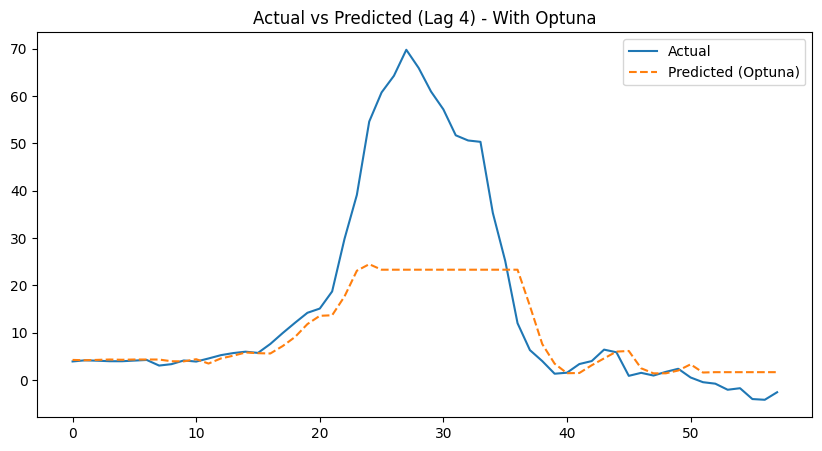

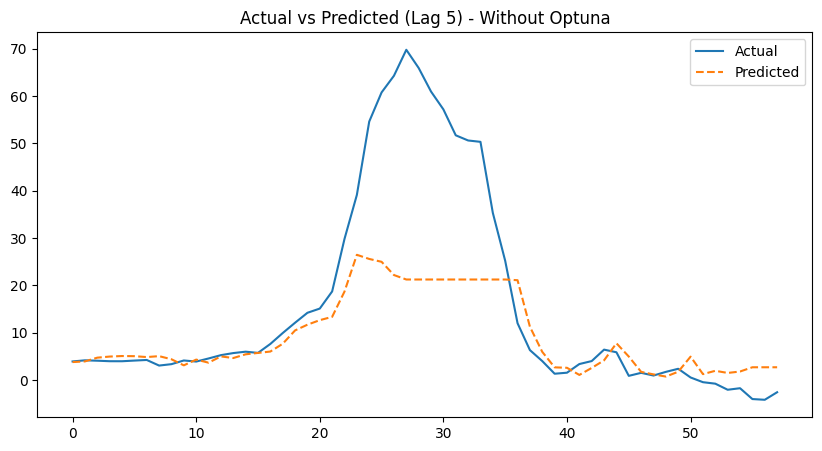

[I 2025-05-29 06:14:38,190] A new study created in memory with name: no-name-985c75d9-cfaa-4ae2-a03c-90176cbcd6ad
[I 2025-05-29 06:14:39,066] Trial 0 finished with value: 2.4609563709239883 and parameters: {'n_estimators': 300, 'max_depth': 13, 'learning_rate': 0.26, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.4609563709239883.
[I 2025-05-29 06:14:41,174] Trial 1 finished with value: 2.4490184941765887 and parameters: {'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.21000000000000002, 'min_child_weight': 2, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.4490184941765887.
[I 2025-05-29 06:14:41,444] Trial 2 finished with value: 2.480390236024184 and parameters: {'n_estimators': 50, 'max_depth': 9, 'learning_rate': 0.16000000000000003, 'min_child_weight': 1, 'subsample': 0.7, 'colsample_bytree': 0.5}. Best is trial 1 with value: 2.4490184941765887.
[I 2025-05-29 06:14:41,953] Trial 3 finished with val

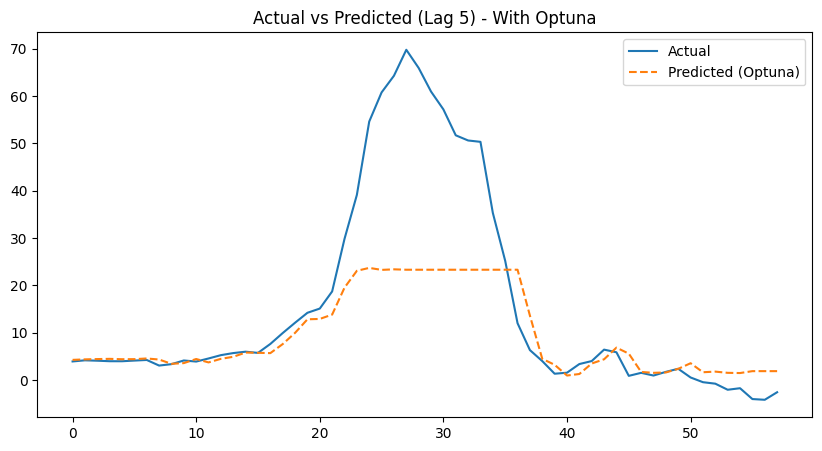

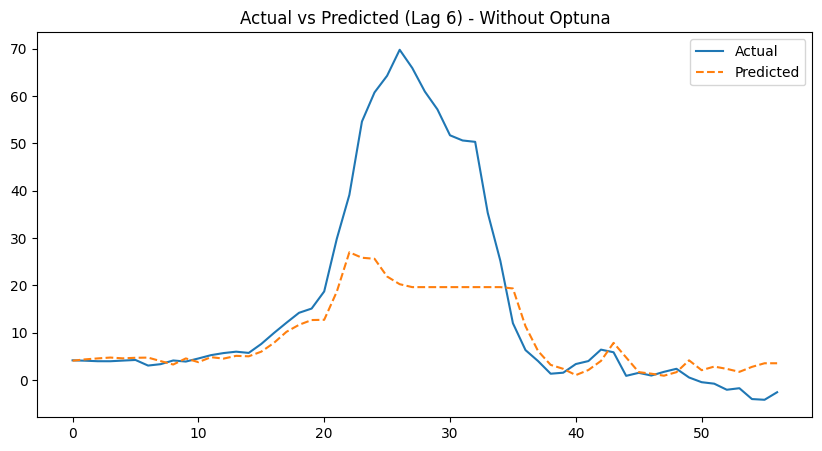

[I 2025-05-29 06:14:47,667] A new study created in memory with name: no-name-d0366533-738b-4be9-94c8-b0eda12d467d
[I 2025-05-29 06:14:47,833] Trial 0 finished with value: 2.4109105866261964 and parameters: {'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 9, 'subsample': 0.5, 'colsample_bytree': 1.0}. Best is trial 0 with value: 2.4109105866261964.
[I 2025-05-29 06:14:48,006] Trial 1 finished with value: 2.296106956911408 and parameters: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 1 with value: 2.296106956911408.
[I 2025-05-29 06:14:48,496] Trial 2 finished with value: 2.422500019888962 and parameters: {'n_estimators': 300, 'max_depth': 9, 'learning_rate': 0.01, 'min_child_weight': 8, 'subsample': 0.7, 'colsample_bytree': 0.6}. Best is trial 1 with value: 2.296106956911408.
[I 2025-05-29 06:14:48,964] Trial 3 finished with value:

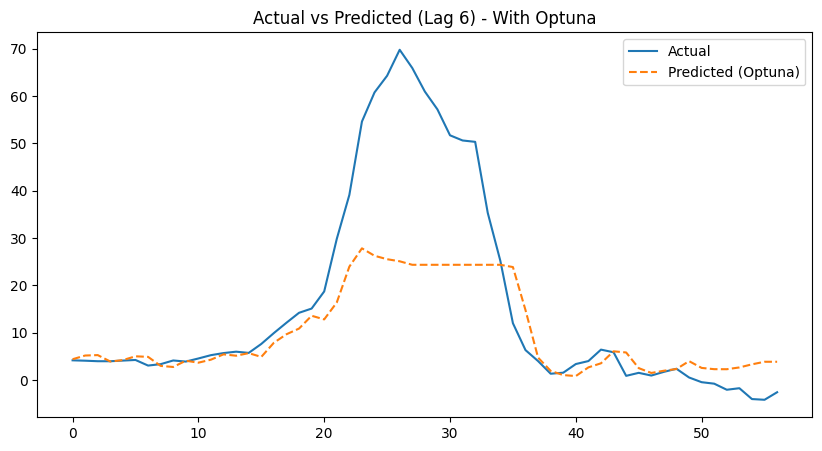

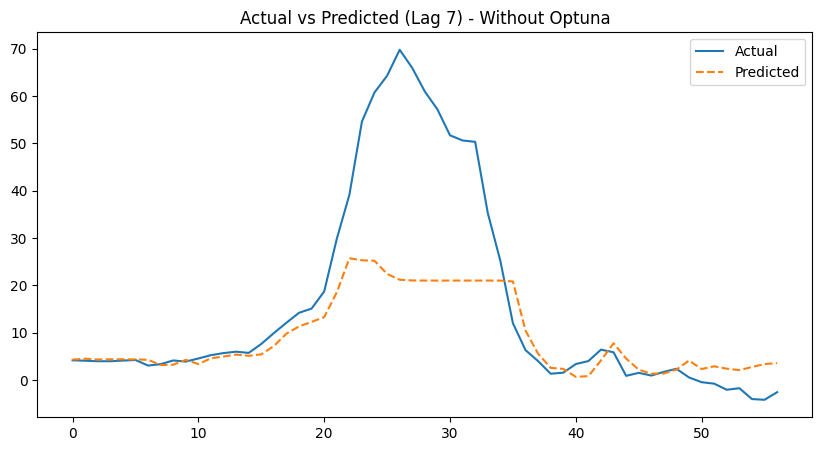

[I 2025-05-29 06:15:01,314] A new study created in memory with name: no-name-ce5529fc-6a5c-4df6-9b82-3ff4c1d19e39
[I 2025-05-29 06:15:01,972] Trial 0 finished with value: 2.0880492576596446 and parameters: {'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.060000000000000005, 'min_child_weight': 4, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.0880492576596446.
[I 2025-05-29 06:15:02,147] Trial 1 finished with value: 2.2595523243126734 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.26, 'min_child_weight': 10, 'subsample': 1.0, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.0880492576596446.
[I 2025-05-29 06:15:02,359] Trial 2 finished with value: 3.4628120385393615 and parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.0880492576596446.
[I 2025-05-29 06:15:02,938] Trial 3 finished with value: 2.59392

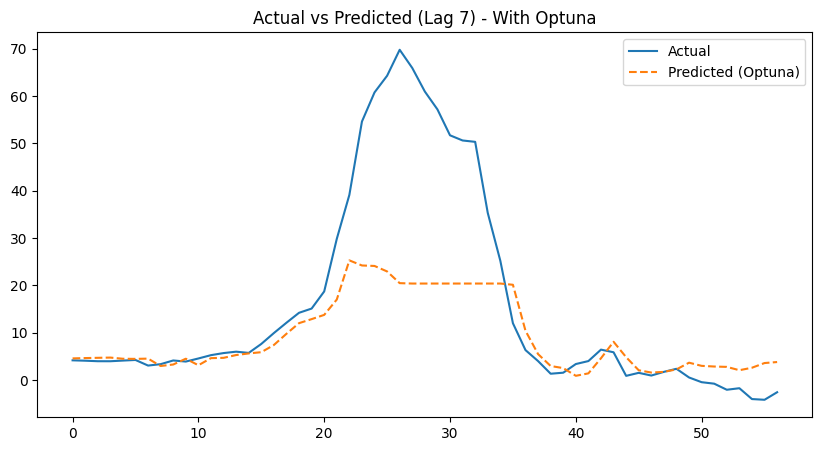

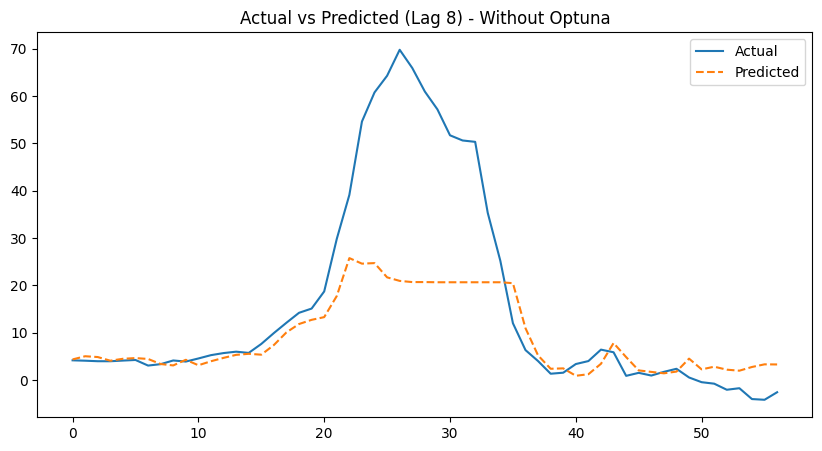

[I 2025-05-29 06:15:19,091] A new study created in memory with name: no-name-93c9de24-dad7-4b5b-855a-339de0e695fb
[I 2025-05-29 06:15:19,289] Trial 0 finished with value: 2.2420938027892183 and parameters: {'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.16000000000000003, 'min_child_weight': 9, 'subsample': 0.9, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.2420938027892183.
[I 2025-05-29 06:15:19,474] Trial 1 finished with value: 2.2474565585972823 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.16000000000000003, 'min_child_weight': 7, 'subsample': 0.8, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.2420938027892183.
[I 2025-05-29 06:15:19,880] Trial 2 finished with value: 2.3692076661147223 and parameters: {'n_estimators': 150, 'max_depth': 9, 'learning_rate': 0.21000000000000002, 'min_child_weight': 6, 'subsample': 0.8, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.2420938027892183.
[I 2025-05-29 06:15:20,149] Trial 3 fi

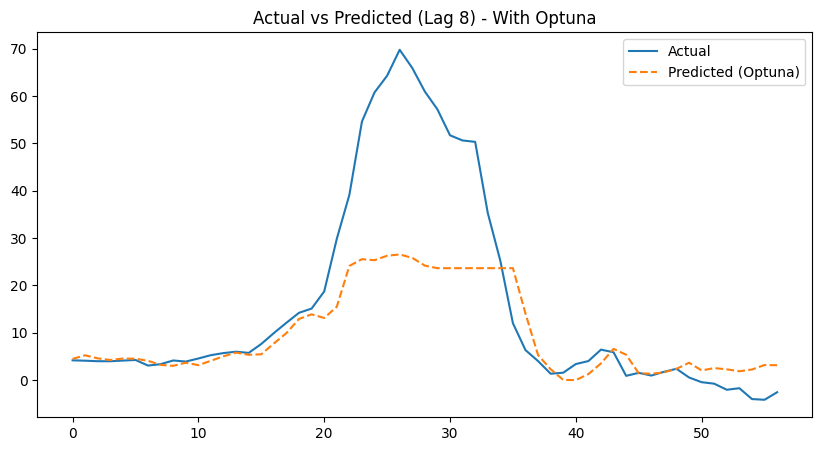

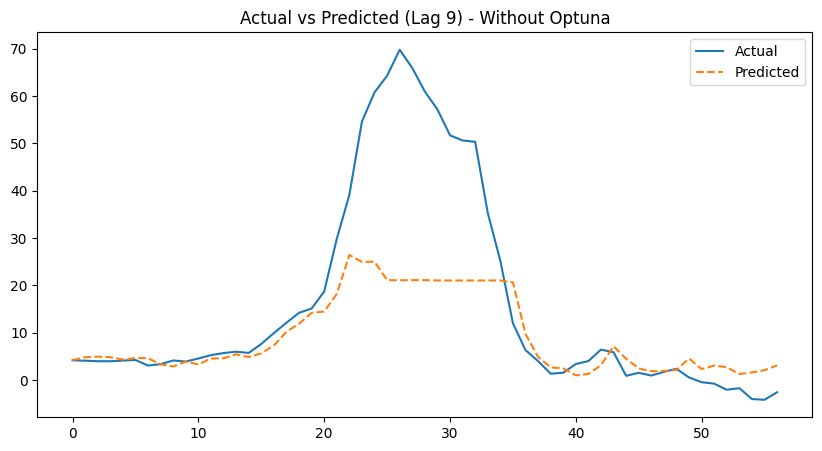

[I 2025-05-29 06:15:31,878] A new study created in memory with name: no-name-644b6f31-2917-4257-b79d-62915e0c6ce0
[I 2025-05-29 06:15:32,570] Trial 0 finished with value: 2.3903340212459527 and parameters: {'n_estimators': 250, 'max_depth': 13, 'learning_rate': 0.21000000000000002, 'min_child_weight': 8, 'subsample': 0.8, 'colsample_bytree': 0.7}. Best is trial 0 with value: 2.3903340212459527.
[I 2025-05-29 06:15:32,817] Trial 1 finished with value: 2.4660815240130143 and parameters: {'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.11, 'min_child_weight': 10, 'subsample': 0.6, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.3903340212459527.
[I 2025-05-29 06:15:33,422] Trial 2 finished with value: 2.10228669520352 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.11, 'min_child_weight': 2, 'subsample': 0.9, 'colsample_bytree': 0.8}. Best is trial 2 with value: 2.10228669520352.
[I 2025-05-29 06:15:33,910] Trial 3 finished with value: 2.139156031

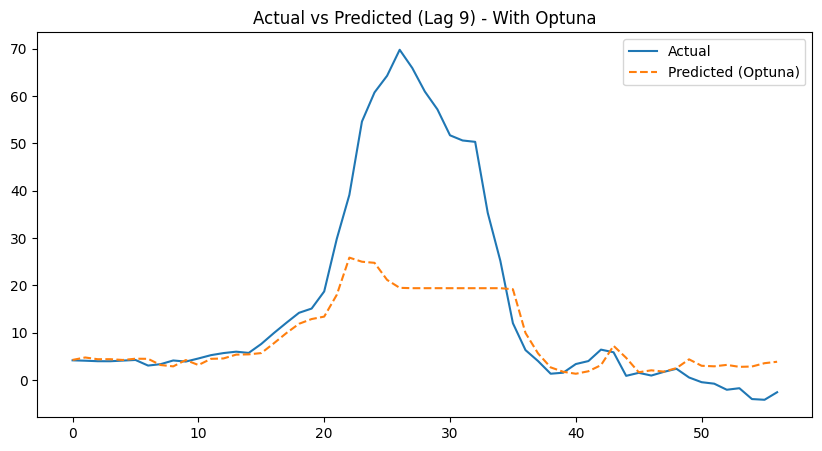

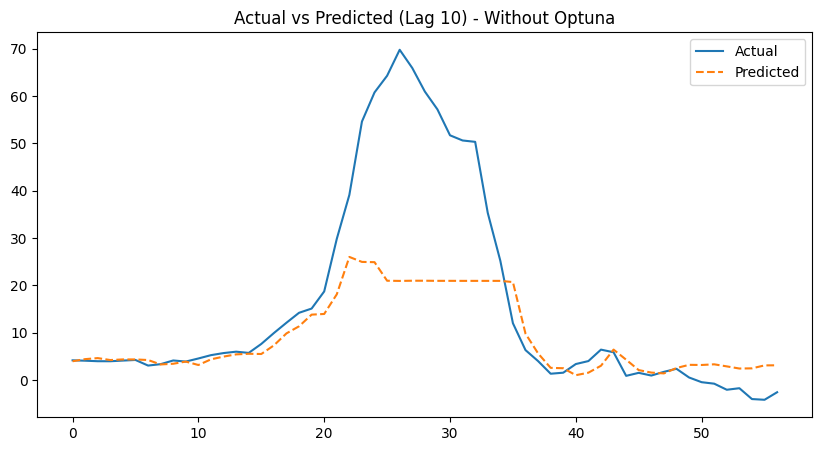

[I 2025-05-29 06:15:47,985] A new study created in memory with name: no-name-6c695ff1-9fb7-481f-9d87-be119998bc6f
[I 2025-05-29 06:15:48,715] Trial 0 finished with value: 2.3472679796586107 and parameters: {'n_estimators': 250, 'max_depth': 9, 'learning_rate': 0.21000000000000002, 'min_child_weight': 3, 'subsample': 0.5, 'colsample_bytree': 0.5}. Best is trial 0 with value: 2.3472679796586107.
[I 2025-05-29 06:15:49,324] Trial 1 finished with value: 2.4806085211192506 and parameters: {'n_estimators': 250, 'max_depth': 11, 'learning_rate': 0.16000000000000003, 'min_child_weight': 7, 'subsample': 0.5, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.3472679796586107.
[I 2025-05-29 06:15:49,779] Trial 2 finished with value: 2.4158568299894396 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 7, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.3472679796586107.
[I 2025-05-29 06:15:50,319] Trial 3

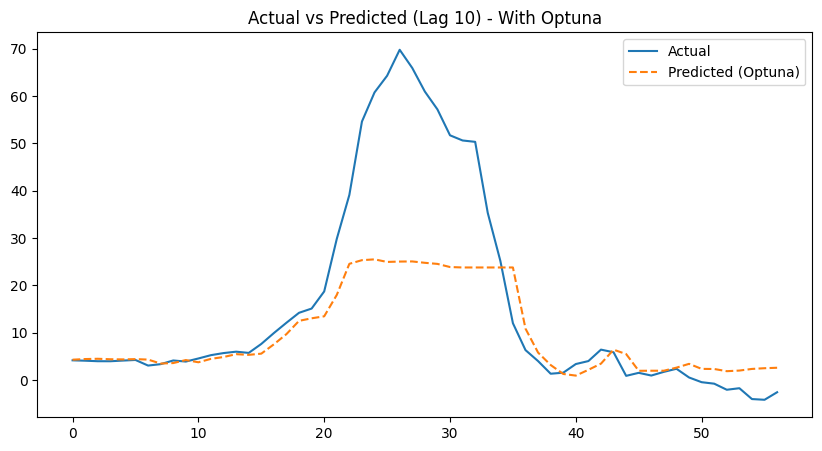

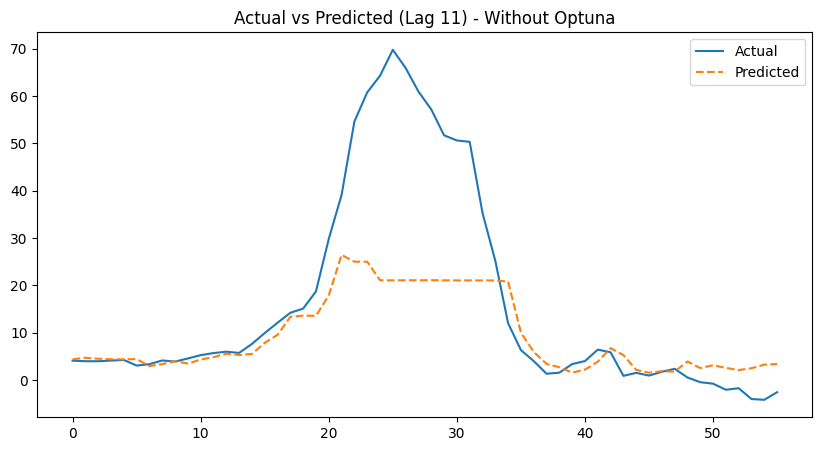

[I 2025-05-29 06:16:00,483] A new study created in memory with name: no-name-b7151159-6096-453f-93e3-85fa2aa0bf22
[I 2025-05-29 06:16:00,991] Trial 0 finished with value: 2.7881250362105208 and parameters: {'n_estimators': 250, 'max_depth': 5, 'learning_rate': 0.060000000000000005, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.7881250362105208.
[I 2025-05-29 06:16:01,689] Trial 1 finished with value: 2.7891832566933075 and parameters: {'n_estimators': 250, 'max_depth': 3, 'learning_rate': 0.21000000000000002, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.8}. Best is trial 0 with value: 2.7881250362105208.
[I 2025-05-29 06:16:01,950] Trial 2 finished with value: 2.6619918093368744 and parameters: {'n_estimators': 50, 'max_depth': 13, 'learning_rate': 0.16000000000000003, 'min_child_weight': 10, 'subsample': 0.7, 'colsample_bytree': 0.9}. Best is trial 2 with value: 2.6619918093368744.
[I 2025-05-29 06:16:02,297] Trial

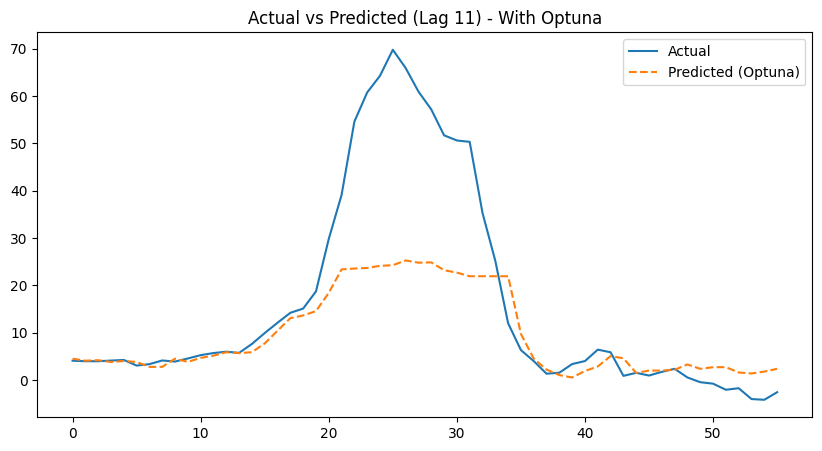

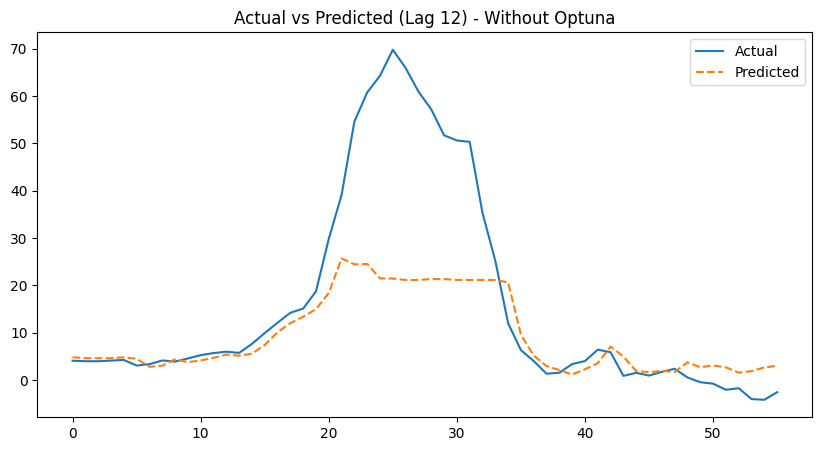

[I 2025-05-29 06:16:22,815] A new study created in memory with name: no-name-182c2b38-e436-4837-b713-f549ad447e27
[I 2025-05-29 06:16:24,906] Trial 0 finished with value: 2.760781400930285 and parameters: {'n_estimators': 200, 'max_depth': 13, 'learning_rate': 0.11, 'min_child_weight': 5, 'subsample': 0.8, 'colsample_bytree': 1.0}. Best is trial 0 with value: 2.760781400930285.
[I 2025-05-29 06:16:25,221] Trial 1 finished with value: 2.8820702072064597 and parameters: {'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.11, 'min_child_weight': 10, 'subsample': 0.6, 'colsample_bytree': 0.6}. Best is trial 0 with value: 2.760781400930285.
[I 2025-05-29 06:16:25,760] Trial 2 finished with value: 2.9379114533229522 and parameters: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.21000000000000002, 'min_child_weight': 5, 'subsample': 1.0, 'colsample_bytree': 0.9}. Best is trial 0 with value: 2.760781400930285.
[I 2025-05-29 06:16:26,246] Trial 3 finished with value: 2.9328533418

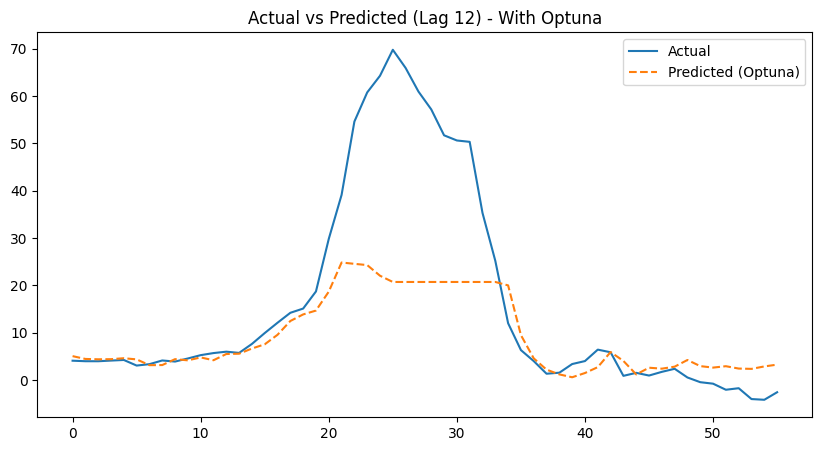

In [12]:
import pandas as pd
import numpy as np
import optuna
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 13):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.8 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train XGBoost model without Optuna
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2 = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, r2, 'N/A'])

    # Plot actual vs. predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted', linestyle='dashed')
    plt.title(f'Actual vs Predicted (Lag {max_lag}) - Without Optuna')
    plt.legend()
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        n_estimators = trial.suggest_int("n_estimators", 50, 300, step=50)
        max_depth = trial.suggest_int("max_depth", 3, 15, step=2)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05)
        min_child_weight = trial.suggest_int("min_child_weight", 1, 10)
        subsample = trial.suggest_float("subsample", 0.5, 1.0, step=0.1)
        colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0, step=0.1)

        xgb_model = xgb.XGBRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            min_child_weight=min_child_weight,
            subsample=subsample,
            colsample_bytree=colsample_bytree,
            random_state=42
        )

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            xgb_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = xgb_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    xgb_best = xgb.XGBRegressor(**best_params, random_state=42)
    xgb_best.fit(X_train, y_train)
    y_pred_optuna = xgb_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna, r2_optuna, best_params])

    # Plot actual vs. predicted values for Optuna model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred_optuna, label='Predicted (Optuna)', linestyle='dashed')
    plt.title(f'Actual vs Predicted (Lag {max_lag}) - With Optuna')
    plt.legend()
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=['Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE', 'Test R2', 'Best Params'])
results_df.to_csv('xgboost_lag_results_with_r2.csv', index=False)


### renamed as XGB_80_20_ModelPerformance

## SVR

## SVR with plots and parameter values

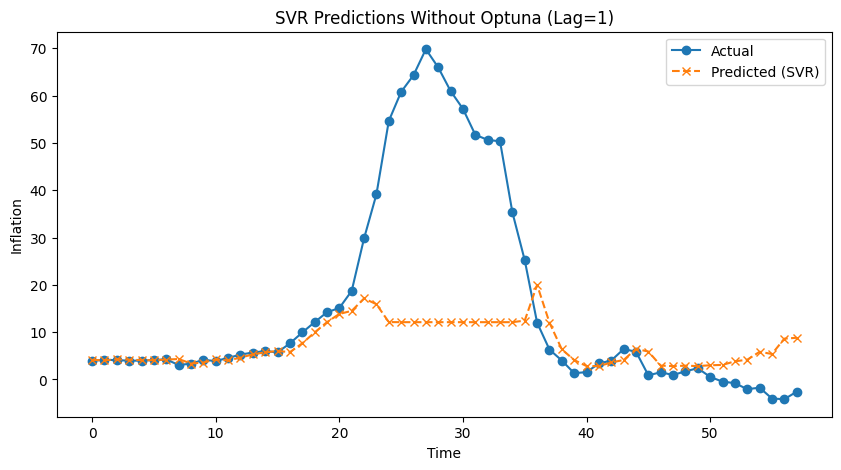

[I 2025-05-29 06:16:43,037] A new study created in memory with name: no-name-d9449893-7326-4c0f-9592-a8feb4263378
[I 2025-05-29 06:16:43,076] Trial 0 finished with value: 64.24362719689705 and parameters: {'C': 8.667351395053434, 'epsilon': 0.5696617262583474, 'kernel': 'sigmoid'}. Best is trial 0 with value: 64.24362719689705.
[I 2025-05-29 06:16:43,146] Trial 1 finished with value: 1.167737433145008 and parameters: {'C': 5.219985222045412, 'epsilon': 0.281240018787211, 'kernel': 'linear'}. Best is trial 1 with value: 1.167737433145008.
[I 2025-05-29 06:16:43,320] Trial 2 finished with value: 4.162399384933957 and parameters: {'C': 3.7331866122539954, 'epsilon': 0.14116194116127329, 'kernel': 'poly'}. Best is trial 1 with value: 1.167737433145008.
[I 2025-05-29 06:16:43,668] Trial 3 finished with value: 4.107483823210324 and parameters: {'C': 7.050130005986039, 'epsilon': 0.6824241240060324, 'kernel': 'poly'}. Best is trial 1 with value: 1.167737433145008.
[I 2025-05-29 06:16:43,700] 

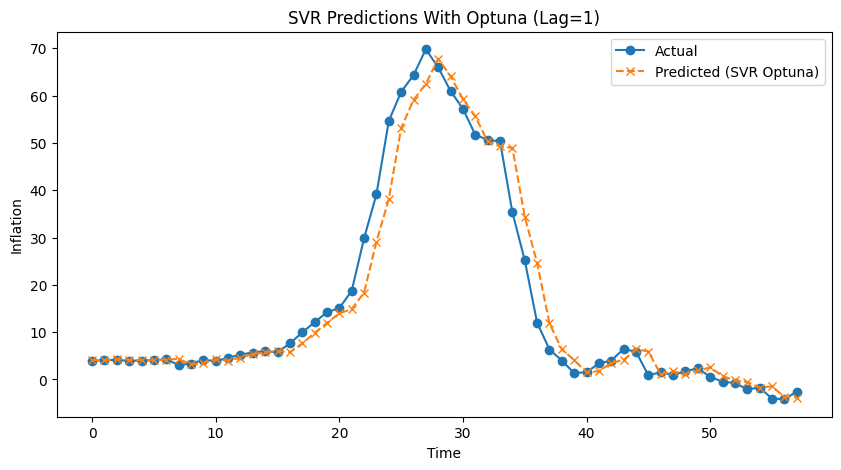

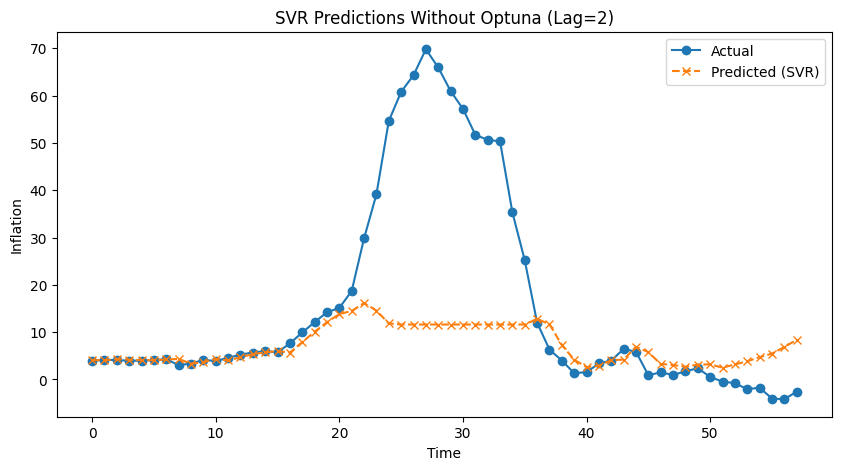

[I 2025-05-29 06:16:45,920] A new study created in memory with name: no-name-b4956be5-da6c-4ba8-8459-7bc3e1c93733
[I 2025-05-29 06:16:46,390] Trial 0 finished with value: 4.371996274270638 and parameters: {'C': 4.9458043910091485, 'epsilon': 0.6568094330147342, 'kernel': 'poly'}. Best is trial 0 with value: 4.371996274270638.
[I 2025-05-29 06:16:47,030] Trial 1 finished with value: 4.4963727474188975 and parameters: {'C': 7.889716587255478, 'epsilon': 0.1329261600790491, 'kernel': 'poly'}. Best is trial 0 with value: 4.371996274270638.
[I 2025-05-29 06:16:47,062] Trial 2 finished with value: 2.5240059779228634 and parameters: {'C': 6.313211381461907, 'epsilon': 0.037199115902170926, 'kernel': 'rbf'}. Best is trial 2 with value: 2.5240059779228634.
[I 2025-05-29 06:16:47,094] Trial 3 finished with value: 2.506801458553345 and parameters: {'C': 5.959233863944512, 'epsilon': 0.12696132219343945, 'kernel': 'rbf'}. Best is trial 3 with value: 2.506801458553345.
[I 2025-05-29 06:16:47,479] T

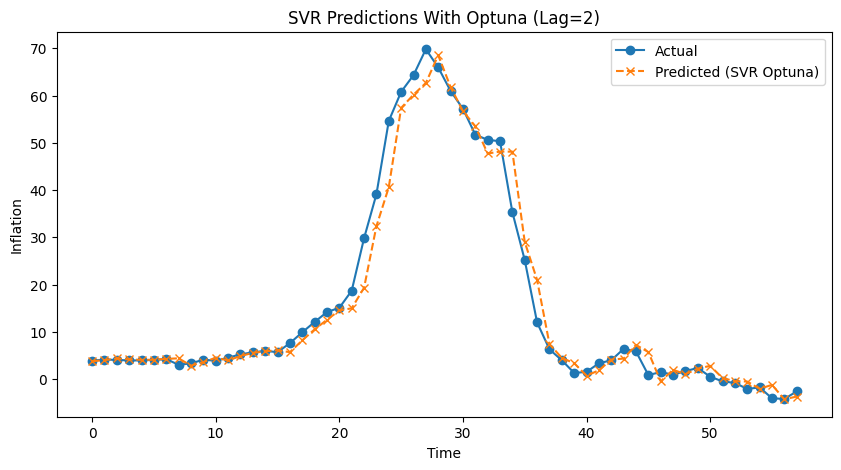

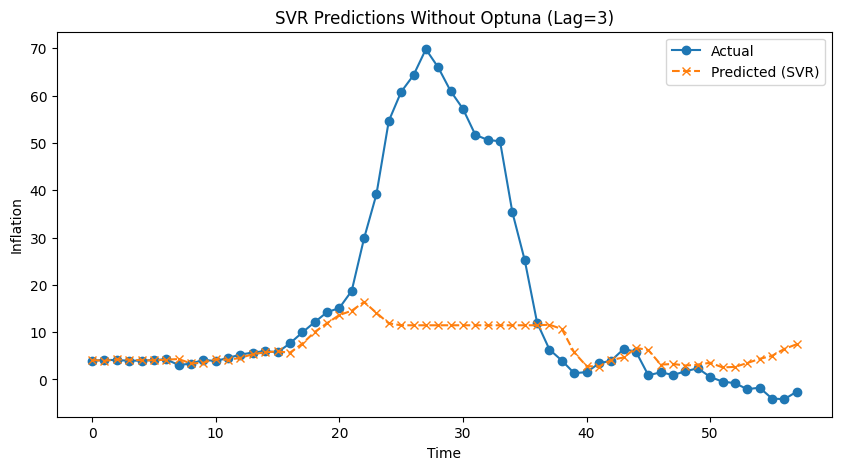

[I 2025-05-29 06:16:48,864] A new study created in memory with name: no-name-c83441ef-f4bd-4f9d-9b57-68370884d2d0
[I 2025-05-29 06:16:49,024] Trial 0 finished with value: 1.1480558436399289 and parameters: {'C': 3.8630099419310175, 'epsilon': 0.2955126178745293, 'kernel': 'linear'}. Best is trial 0 with value: 1.1480558436399289.
[I 2025-05-29 06:16:49,072] Trial 1 finished with value: 2.7164075964347054 and parameters: {'C': 1.8142751143630316, 'epsilon': 0.0476074584963663, 'kernel': 'rbf'}. Best is trial 0 with value: 1.1480558436399289.
[I 2025-05-29 06:16:49,105] Trial 2 finished with value: 2.5134986295117026 and parameters: {'C': 7.590551158919579, 'epsilon': 0.8514940448920864, 'kernel': 'rbf'}. Best is trial 0 with value: 1.1480558436399289.
[I 2025-05-29 06:16:49,140] Trial 3 finished with value: 2.5655546971895022 and parameters: {'C': 8.872124680826994, 'epsilon': 0.20226448244090478, 'kernel': 'rbf'}. Best is trial 0 with value: 1.1480558436399289.
[I 2025-05-29 06:16:49,1

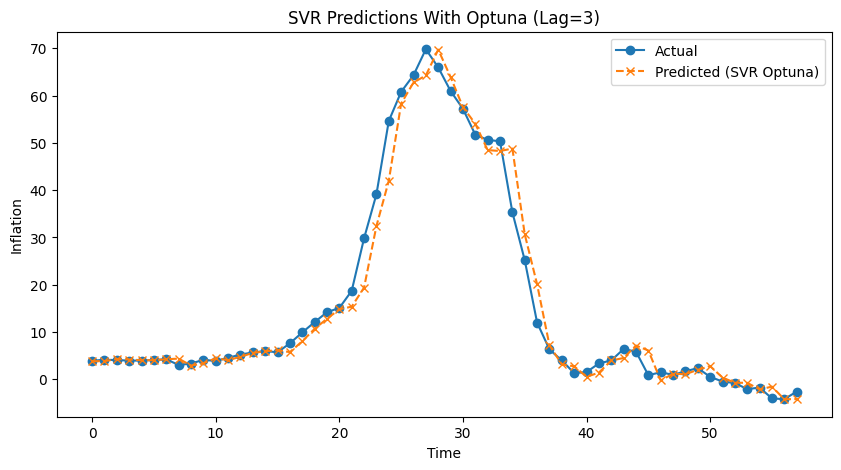

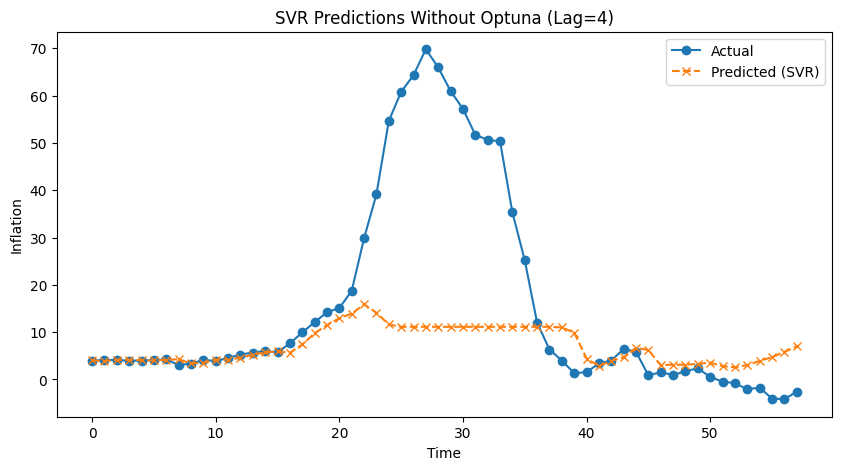

[I 2025-05-29 06:16:52,994] A new study created in memory with name: no-name-d9663d1c-4ac3-4b7b-ac0c-e161a0358188
[I 2025-05-29 06:16:53,034] Trial 0 finished with value: 17.995423106958906 and parameters: {'C': 2.006187722926857, 'epsilon': 0.8185236207691117, 'kernel': 'sigmoid'}. Best is trial 0 with value: 17.995423106958906.
[I 2025-05-29 06:16:53,072] Trial 1 finished with value: 29.882192964647174 and parameters: {'C': 3.7356229388017024, 'epsilon': 0.5749280939375365, 'kernel': 'sigmoid'}. Best is trial 0 with value: 17.995423106958906.
[I 2025-05-29 06:16:53,105] Trial 2 finished with value: 13.208652048011439 and parameters: {'C': 1.2885070345423886, 'epsilon': 0.2877239889565876, 'kernel': 'sigmoid'}. Best is trial 2 with value: 13.208652048011439.
[I 2025-05-29 06:16:53,427] Trial 3 finished with value: 4.545787748997477 and parameters: {'C': 3.596518029806867, 'epsilon': 0.9428078433574769, 'kernel': 'poly'}. Best is trial 3 with value: 4.545787748997477.
[I 2025-05-29 06:

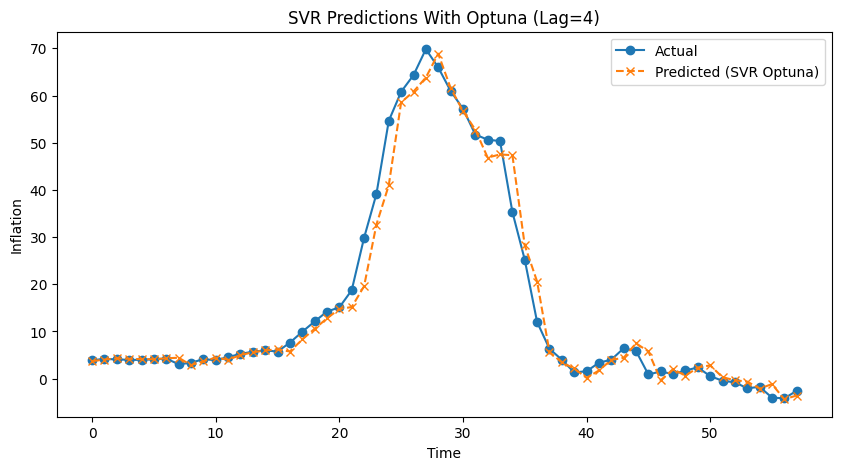

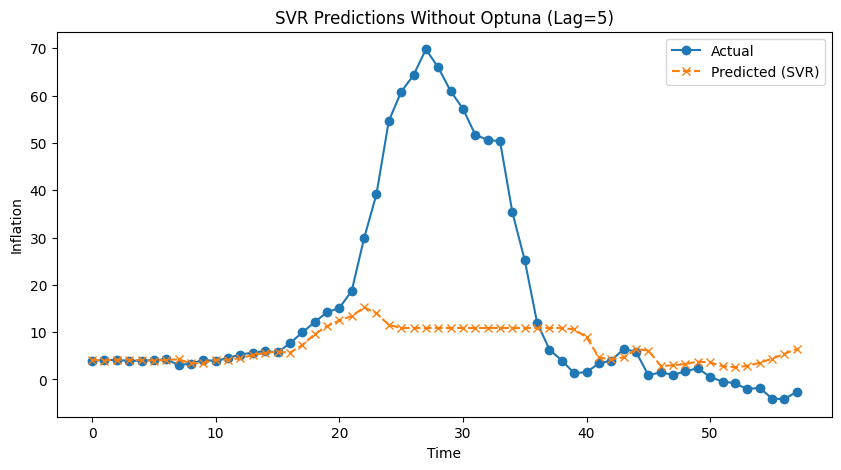

[I 2025-05-29 06:17:00,008] A new study created in memory with name: no-name-7bb4ff01-7912-438c-bc7b-b23c8a07e076
[I 2025-05-29 06:17:00,164] Trial 0 finished with value: 1.1556641047798755 and parameters: {'C': 1.3834679421755514, 'epsilon': 0.020993817632358264, 'kernel': 'linear'}. Best is trial 0 with value: 1.1556641047798755.
[I 2025-05-29 06:17:00,315] Trial 1 finished with value: 1.1523452002944272 and parameters: {'C': 1.6812436531975616, 'epsilon': 0.011350725146631662, 'kernel': 'linear'}. Best is trial 1 with value: 1.1523452002944272.
[I 2025-05-29 06:17:00,394] Trial 2 finished with value: 1.2076202225083656 and parameters: {'C': 0.591361907515935, 'epsilon': 0.39453686328366105, 'kernel': 'linear'}. Best is trial 1 with value: 1.1523452002944272.
[I 2025-05-29 06:17:00,432] Trial 3 finished with value: 19.409074271837028 and parameters: {'C': 2.295824908882267, 'epsilon': 0.8818918302008587, 'kernel': 'sigmoid'}. Best is trial 1 with value: 1.1523452002944272.
[I 2025-05

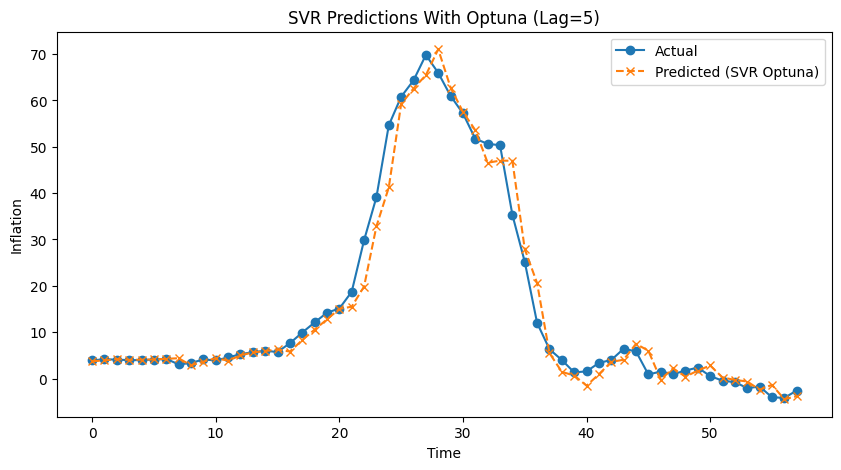

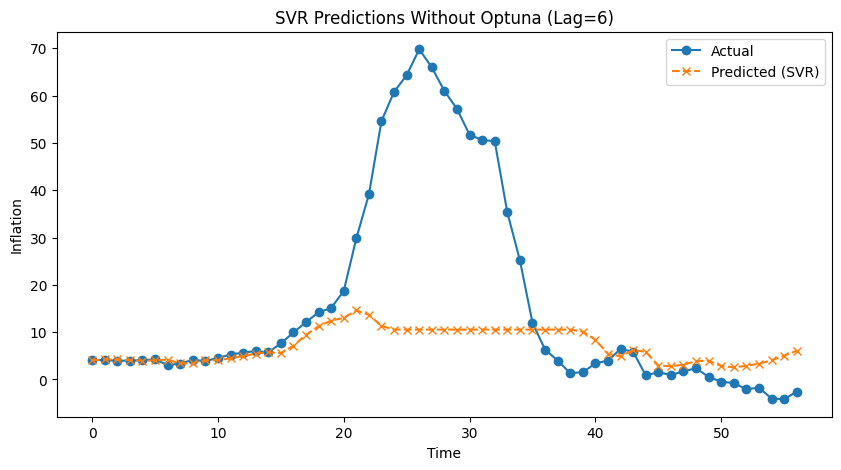

[I 2025-05-29 06:17:05,641] A new study created in memory with name: no-name-496f096c-c601-44a8-ac78-db3c3e73ed0a
[I 2025-05-29 06:17:06,018] Trial 0 finished with value: 4.913006604097996 and parameters: {'C': 4.081683052585452, 'epsilon': 0.7892350810441308, 'kernel': 'poly'}. Best is trial 0 with value: 4.913006604097996.
[I 2025-05-29 06:17:06,062] Trial 1 finished with value: 2.8319801162839933 and parameters: {'C': 7.0643199490396205, 'epsilon': 0.9197491860519691, 'kernel': 'rbf'}. Best is trial 1 with value: 2.8319801162839933.
[I 2025-05-29 06:17:06,429] Trial 2 finished with value: 4.71805883176962 and parameters: {'C': 3.7005597937021877, 'epsilon': 0.3966417842684186, 'kernel': 'poly'}. Best is trial 1 with value: 2.8319801162839933.
[I 2025-05-29 06:17:06,482] Trial 3 finished with value: 47.88742881718874 and parameters: {'C': 6.714524789469866, 'epsilon': 0.7946984936687398, 'kernel': 'sigmoid'}. Best is trial 1 with value: 2.8319801162839933.
[I 2025-05-29 06:17:06,982]

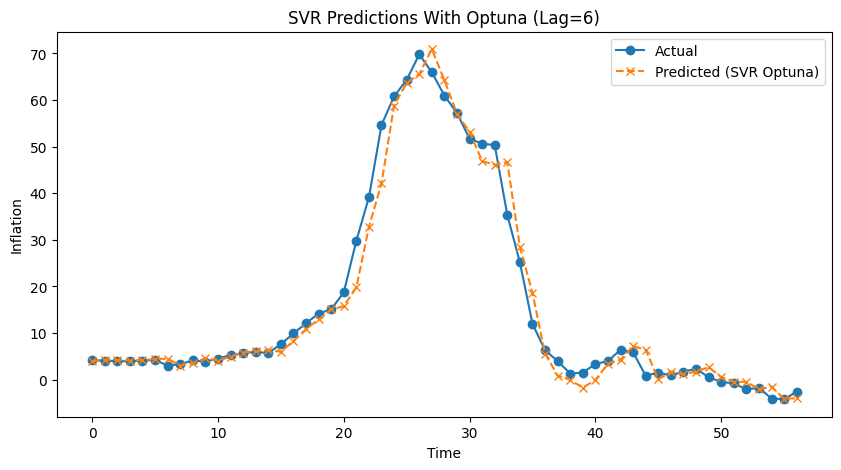

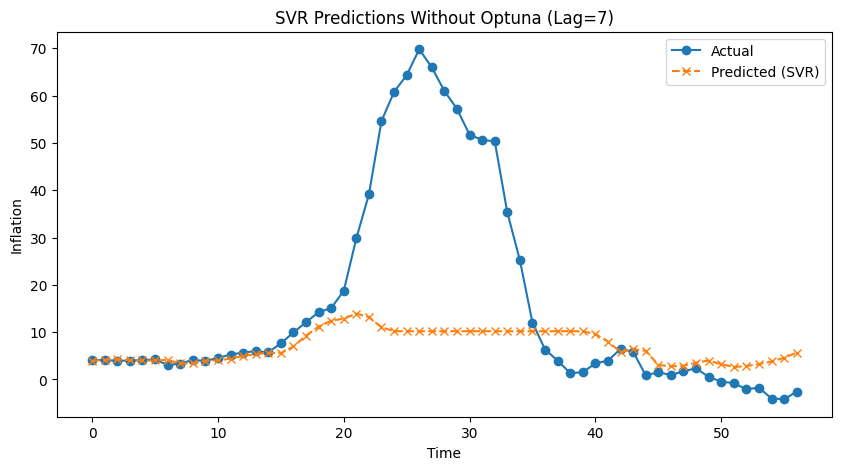

[I 2025-05-29 06:17:13,495] A new study created in memory with name: no-name-5e429720-f4cd-446b-af3b-fabb68626d24
[I 2025-05-29 06:17:13,543] Trial 0 finished with value: 2.796146818110952 and parameters: {'C': 6.754979217620729, 'epsilon': 0.23874837957913358, 'kernel': 'rbf'}. Best is trial 0 with value: 2.796146818110952.
[I 2025-05-29 06:17:13,581] Trial 1 finished with value: 34.09661382620434 and parameters: {'C': 4.572723352547777, 'epsilon': 0.8985895725077226, 'kernel': 'sigmoid'}. Best is trial 0 with value: 2.796146818110952.
[I 2025-05-29 06:17:13,617] Trial 2 finished with value: 2.7910986677557315 and parameters: {'C': 7.0399806021710996, 'epsilon': 0.9781704712320549, 'kernel': 'rbf'}. Best is trial 2 with value: 2.7910986677557315.
[I 2025-05-29 06:17:13,655] Trial 3 finished with value: 64.74620482449896 and parameters: {'C': 9.227856310129148, 'epsilon': 0.6584941612122682, 'kernel': 'sigmoid'}. Best is trial 2 with value: 2.7910986677557315.
[I 2025-05-29 06:17:13,70

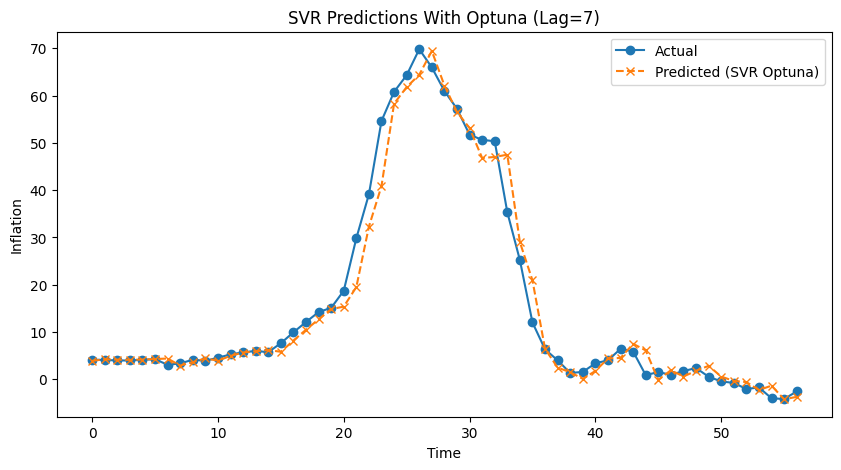

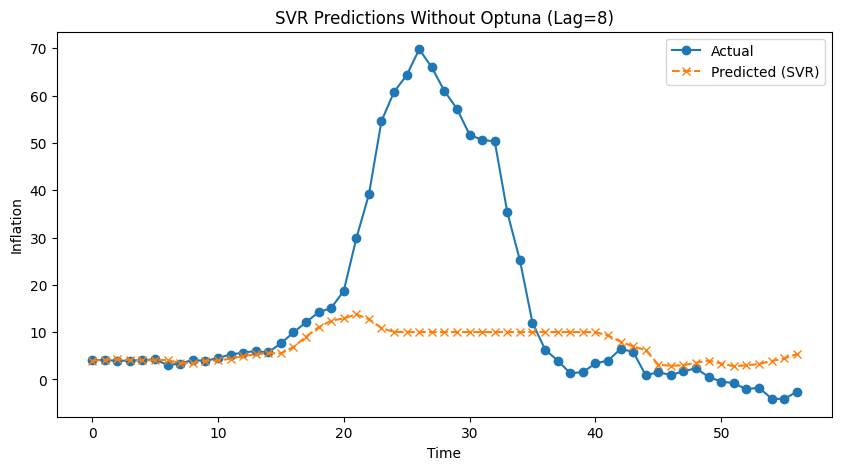

[I 2025-05-29 06:17:21,153] A new study created in memory with name: no-name-e4567c50-e679-467f-9437-cae34cc94981
[I 2025-05-29 06:17:22,086] Trial 0 finished with value: 5.085909672803431 and parameters: {'C': 9.33316938783193, 'epsilon': 0.46069780338882627, 'kernel': 'poly'}. Best is trial 0 with value: 5.085909672803431.
[I 2025-05-29 06:17:22,124] Trial 1 finished with value: 3.7888684672456003 and parameters: {'C': 0.32958936753864065, 'epsilon': 0.6091733913143536, 'kernel': 'rbf'}. Best is trial 1 with value: 3.7888684672456003.
[I 2025-05-29 06:17:22,165] Trial 2 finished with value: 2.8633460484419904 and parameters: {'C': 9.24238715984303, 'epsilon': 0.24983065928132295, 'kernel': 'rbf'}. Best is trial 2 with value: 2.8633460484419904.
[I 2025-05-29 06:17:22,219] Trial 3 finished with value: 4.34289810624798 and parameters: {'C': 0.12884448474637256, 'epsilon': 0.12607231991040885, 'kernel': 'poly'}. Best is trial 2 with value: 2.8633460484419904.
[I 2025-05-29 06:17:22,264]

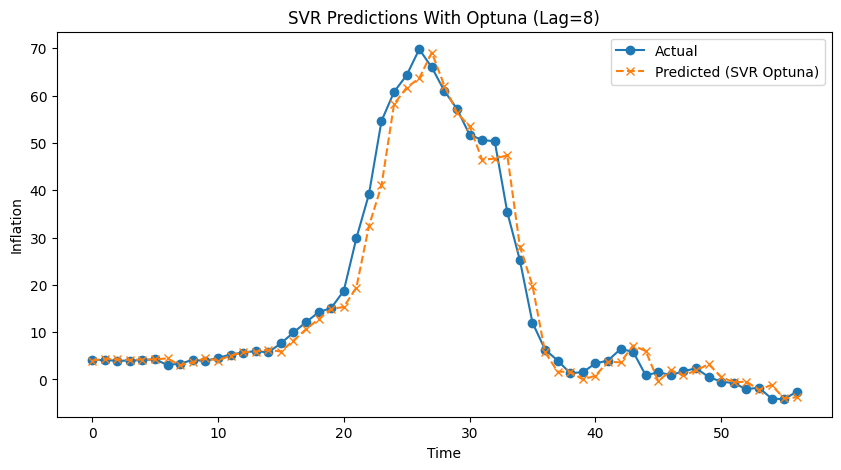

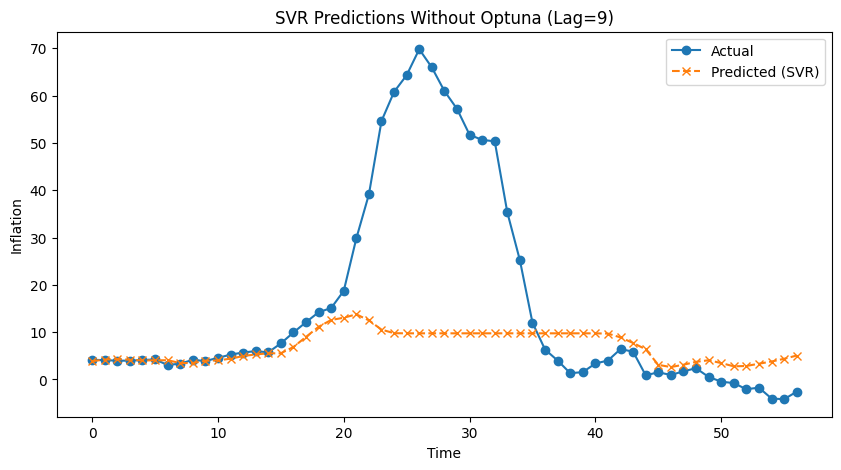

[I 2025-05-29 06:17:32,319] A new study created in memory with name: no-name-71efef04-cee8-4ee0-bef3-cc6769a1c333
[I 2025-05-29 06:17:32,451] Trial 0 finished with value: 4.673555607130792 and parameters: {'C': 1.0831190222088196, 'epsilon': 0.3191638302199582, 'kernel': 'poly'}. Best is trial 0 with value: 4.673555607130792.
[I 2025-05-29 06:17:32,972] Trial 1 finished with value: 1.1485201020010878 and parameters: {'C': 3.1834278434394347, 'epsilon': 0.6419829239236482, 'kernel': 'linear'}. Best is trial 1 with value: 1.1485201020010878.
[I 2025-05-29 06:17:33,025] Trial 2 finished with value: 58.68330444174153 and parameters: {'C': 8.889616268928735, 'epsilon': 0.8235920962752357, 'kernel': 'sigmoid'}. Best is trial 1 with value: 1.1485201020010878.
[I 2025-05-29 06:17:33,070] Trial 3 finished with value: 23.396611015236438 and parameters: {'C': 3.0929307627325526, 'epsilon': 0.6078687238307429, 'kernel': 'sigmoid'}. Best is trial 1 with value: 1.1485201020010878.
[I 2025-05-29 06:1

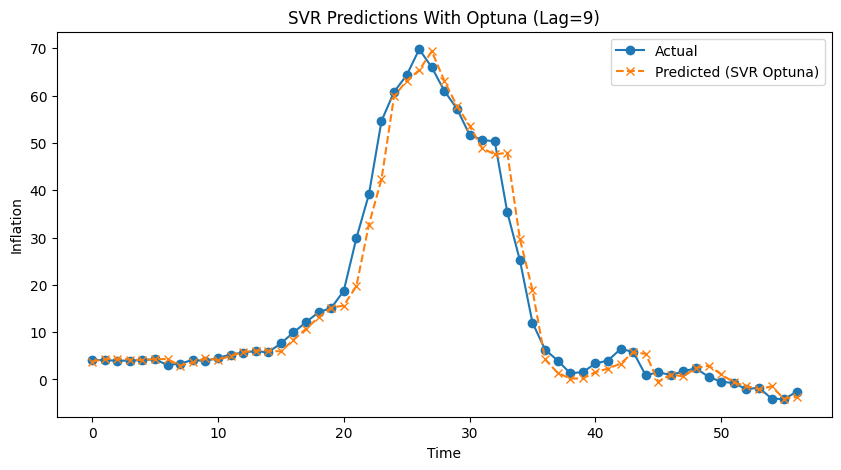

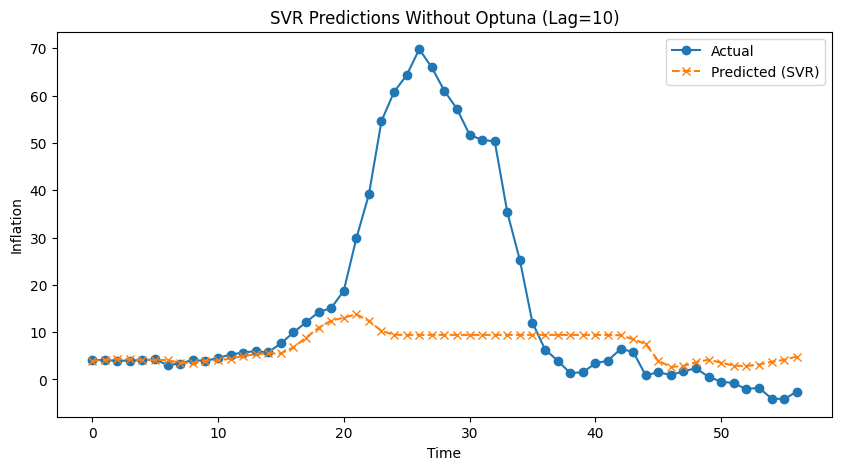

[I 2025-05-29 06:17:46,997] A new study created in memory with name: no-name-d25e00ff-864d-4de9-96fd-c35d9ed11d11
[I 2025-05-29 06:17:47,050] Trial 0 finished with value: 3.380666521819677 and parameters: {'C': 2.139422117943653, 'epsilon': 0.16035975137694689, 'kernel': 'rbf'}. Best is trial 0 with value: 3.380666521819677.
[I 2025-05-29 06:17:47,094] Trial 1 finished with value: 3.212317322694522 and parameters: {'C': 8.036871496748438, 'epsilon': 0.7968074590570647, 'kernel': 'rbf'}. Best is trial 1 with value: 3.212317322694522.
[I 2025-05-29 06:17:47,137] Trial 2 finished with value: 3.217768144639185 and parameters: {'C': 8.275357216029299, 'epsilon': 0.4837053668737247, 'kernel': 'rbf'}. Best is trial 1 with value: 3.212317322694522.
[I 2025-05-29 06:17:47,370] Trial 3 finished with value: 5.011717953840982 and parameters: {'C': 1.5794875733011728, 'epsilon': 0.7713268886618666, 'kernel': 'poly'}. Best is trial 1 with value: 3.212317322694522.
[I 2025-05-29 06:17:47,470] Trial 4

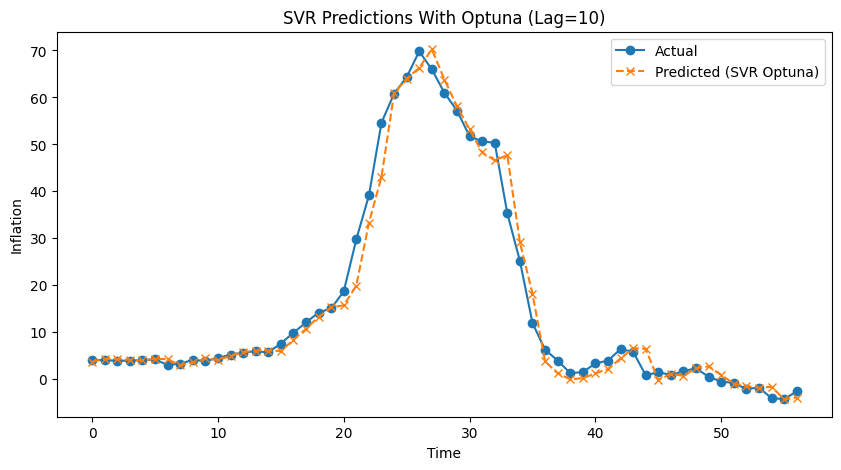

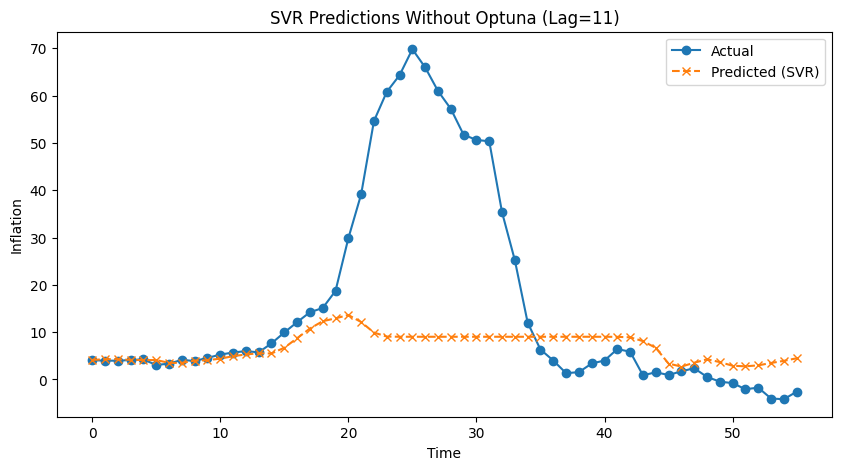

[I 2025-05-29 06:17:59,307] A new study created in memory with name: no-name-bdd2f5be-df03-4a72-98e6-5f050113cdc7
[I 2025-05-29 06:17:59,359] Trial 0 finished with value: 53.487052704811916 and parameters: {'C': 8.18837064439419, 'epsilon': 0.13408377676557376, 'kernel': 'sigmoid'}. Best is trial 0 with value: 53.487052704811916.
[I 2025-05-29 06:17:59,568] Trial 1 finished with value: 6.313520613393091 and parameters: {'C': 1.9567864868928797, 'epsilon': 0.35166433001794667, 'kernel': 'poly'}. Best is trial 1 with value: 6.313520613393091.
[I 2025-05-29 06:17:59,608] Trial 2 finished with value: 3.6673727751695173 and parameters: {'C': 1.1733872612383305, 'epsilon': 0.5550835993746679, 'kernel': 'rbf'}. Best is trial 2 with value: 3.6673727751695173.
[I 2025-05-29 06:17:59,648] Trial 3 finished with value: 3.416546991848218 and parameters: {'C': 6.6485557444013965, 'epsilon': 0.9827600138817898, 'kernel': 'rbf'}. Best is trial 3 with value: 3.416546991848218.
[I 2025-05-29 06:18:00,24

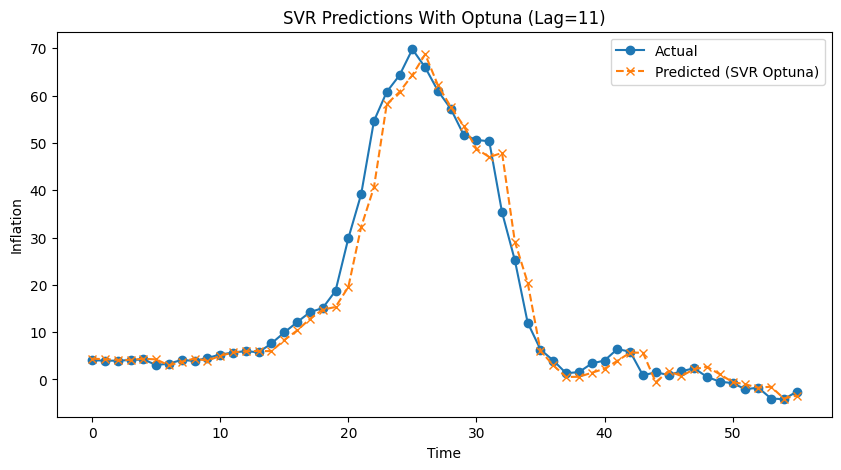

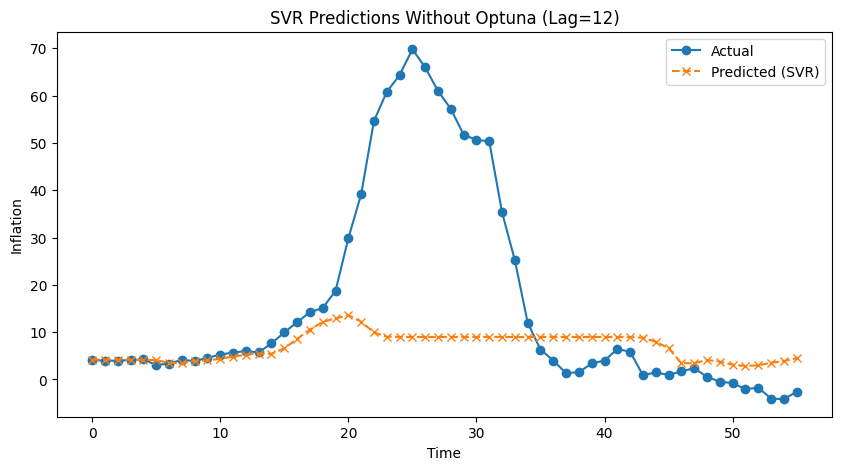

[I 2025-05-29 06:18:21,142] A new study created in memory with name: no-name-dc037b42-47ea-43b2-83d3-6cf7f8317ce6
[I 2025-05-29 06:18:21,212] Trial 0 finished with value: 54.715944608802964 and parameters: {'C': 8.74565651220348, 'epsilon': 0.22260738587035217, 'kernel': 'sigmoid'}. Best is trial 0 with value: 54.715944608802964.
[I 2025-05-29 06:18:21,777] Trial 1 finished with value: 8.368316915838573 and parameters: {'C': 7.035870471469467, 'epsilon': 0.23735095960018737, 'kernel': 'poly'}. Best is trial 1 with value: 8.368316915838573.
[I 2025-05-29 06:18:21,821] Trial 2 finished with value: 3.504101502342942 and parameters: {'C': 4.867014389585509, 'epsilon': 0.6254604583777459, 'kernel': 'rbf'}. Best is trial 2 with value: 3.504101502342942.
[I 2025-05-29 06:18:21,994] Trial 3 finished with value: 6.778239556363774 and parameters: {'C': 1.7776652533598298, 'epsilon': 0.6244889271415268, 'kernel': 'poly'}. Best is trial 2 with value: 3.504101502342942.
[I 2025-05-29 06:18:22,041] 

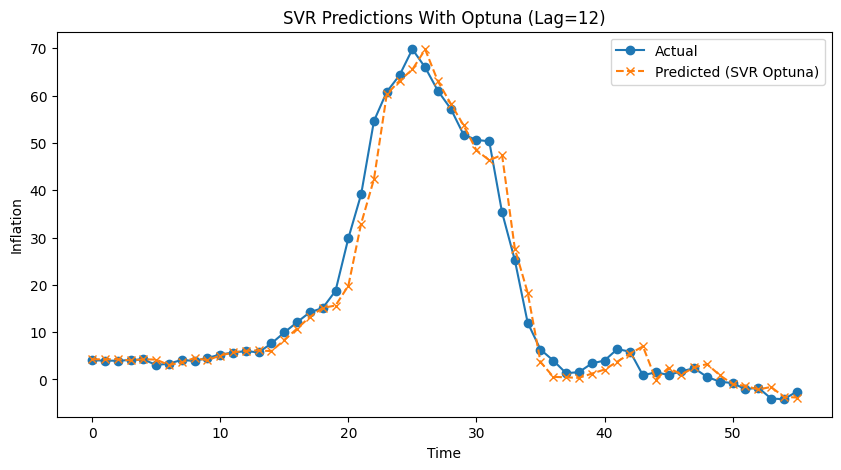

In [13]:
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit

# Initialize results list
results = []

# Loop through lag terms from 1 to 12
for max_lag in range(1, 13):
    df_lagged = df.copy()

    # Create lag features
    for lag in range(1, max_lag + 1):
        df_lagged[f'Inflation_Lag_{lag}'] = df_lagged['Inflation'].shift(lag)

    # Drop NaN values
    df_lagged = df_lagged.dropna()

    # Split into train and test sets
    train_size = int(0.8 * len(df_lagged))
    train, test = df_lagged[:train_size], df_lagged[train_size:]

    y_train, y_test = train['Inflation'], test['Inflation']
    X_train = train[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]
    X_test = test[[f'Inflation_Lag_{lag}' for lag in range(1, max_lag + 1)]]

    # Train SVR model without Optuna
    svr_model = SVR()
    svr_model.fit(X_train, y_train)
    y_pred = svr_model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    r2_baseline = r2_score(y_test, y_pred)

    results.append([max_lag, 'Without Optuna', rmse, mse, mae, mape, None, None, None, r2_baseline])

    # Plot actual vs. predicted values for the baseline model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred, label="Predicted (SVR)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions Without Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

    # Define Optuna objective function
    def objective(trial):
        C = trial.suggest_float("C", 0.1, 10.0)
        epsilon = trial.suggest_float("epsilon", 0.01, 1.0)
        kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly", "sigmoid"])

        svr_model = SVR(C=C, epsilon=epsilon, kernel=kernel)

        tscv = TimeSeriesSplit(n_splits=5)
        rmse_scores = []
        for train_idx, val_idx in tscv.split(X_train):
            X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

            svr_model.fit(X_train_fold, y_train_fold)
            y_pred_fold = svr_model.predict(X_val_fold)
            rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred_fold)))

        return np.mean(rmse_scores)

    # Run Optuna optimization
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=20)
    best_params = study.best_params

    # Train best model
    svr_best = SVR(**best_params)
    svr_best.fit(X_train, y_train)
    y_pred_optuna = svr_best.predict(X_test)

    # Evaluate Optuna model
    mse_optuna = mean_squared_error(y_test, y_pred_optuna)
    rmse_optuna = np.sqrt(mse_optuna)
    mae_optuna = mean_absolute_error(y_test, y_pred_optuna)
    mape_optuna = np.mean(np.abs((y_test - y_pred_optuna) / y_test)) * 100
    r2_optuna = r2_score(y_test, y_pred_optuna)

    results.append([
        max_lag, 'With Optuna', rmse_optuna, mse_optuna, mae_optuna, mape_optuna,
        best_params['C'], best_params['epsilon'], best_params['kernel'], r2_optuna
    ])

    # Plot actual vs. predicted values for Optuna-optimized model
    plt.figure(figsize=(10, 5))
    plt.plot(y_test.values, label="Actual", marker='o')
    plt.plot(y_pred_optuna, label="Predicted (SVR Optuna)", linestyle='dashed', marker='x')
    plt.title(f'SVR Predictions With Optuna (Lag={max_lag})')
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Inflation")
    plt.show()

# Save results to CSV
results_df = pd.DataFrame(results, columns=[
    'Lag Terms', 'Model Type', 'Test RMSE', 'Test MSE', 'Test MAE', 'Test MAPE',
    'Best C', 'Best Epsilon', 'Best Kernel', 'R²'
])
results_df.to_csv('svr_lag_results2.csv', index=False)


### renamed as SVR_80_20_ModelPerformance